# **Практическая работа по линейной регрессии**

# **Импорт библиотек**

In [1]:
# Библиотека для продвинутой работы с многомерными массивами данных
import numpy as np

# Библиотека для простой визуализации данных
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 8    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True            # Сетка графика
plt.pink()                                  # Цветовая схема при раскраске

# Работа с таблицами данных
import pandas as pd

# Машинное обучение
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split                    # Деление датасета
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV     # Модели регрессии
from sklearn.metrics import r2_score, mean_absolute_error               # Метрики качества регрессии

c_pallete = ['#DC143C',   # Crimson
             '#00FA9A',   # MediumSpringGreen
             '#FF1493',   # DeepPink
             '#20B2AA',   # LightSeaGreen
             '#1E90FF',   # DodgerBlue
             '#FFD700',   # Gold
             '#00008B',   # DarkBlue
             '#4B0082',   # Indigo
             '#008080']   # Teal

<Figure size 720x576 with 0 Axes>

# **Задача регрессии**

**Задача регрессии** $-$ задача восстановления непрерывной зависимости $y \sim x$, при наличии набора примеров точечных зависимостей этих переменных в виде таблицы.

**Пример зависимости от одной переменной**:
$$
\begin{matrix}
x & y \\
\text{___} & \text{___}\\
x_1 & y_1 \\
x_2 & y_2 \\
\dots & \dots \\
x_m & y_m
\end{matrix}
$$

где $x_i, y_i\ -$ точечные значения переменных, при $i = 1, 2, \dots, m$.


В таком случае мы имеем возможность построить модель зависимости $\hat{y}(x)$, аппроксимирующую исходную предполагаемую зависимость $y(x)$ в аналитическом виде.

К примеру мы предполагаем, что наши данные $y_i$ зависят от $x_i$ по следующему закону:

$$
y(x) = a \cdot g(x) + b + Ε(x),
$$
где $Ε(x)\ -$ не моделируемый в общем случае случайный шум с **нулевым математическим ожиданием**, а $g(x)\ -$ неизвестная зависимость, $a, b\ -$ постоянные.

Тогда имеет место быть возможное представление модели:

$$
\hat{y}(x) = c \cdot p(x) + d \approx y(x),
$$
которое в некотором смысле аппроксимирует исходную зависимость, то есть проходит через минимум отклонений модели от данных. То есть ставится задача минимизации ошибок между моделью и функцией,  заданной таблично:

$$
|| \hat{y}(x) - y(x) ||_{L_2}^2 \to \underset{c, d}{min}.
$$


## **Линейная регрессия на одну переменную**:

Линейная регрессия на одну переменную восстанавливает зависимость $y \sim x$ в виде предполагаемой модели $\hat{y}(x)$, представляемой в виде линейной комбинации переменных с постоянными коэффициентами:


$$
\hat{y}(x) = a \cdot x + b \approx y(x),
$$

где $a, b\ -$ постоянные коэффициенты прямой.


На визуализации представлен принцип работы модели линейной регрессии на одну переменную. Имеется предполагаемая линейная зависимость с шумом вокруг тренда и необходимо оценить параметры прямой, зависимость которой мы наблюдаем.

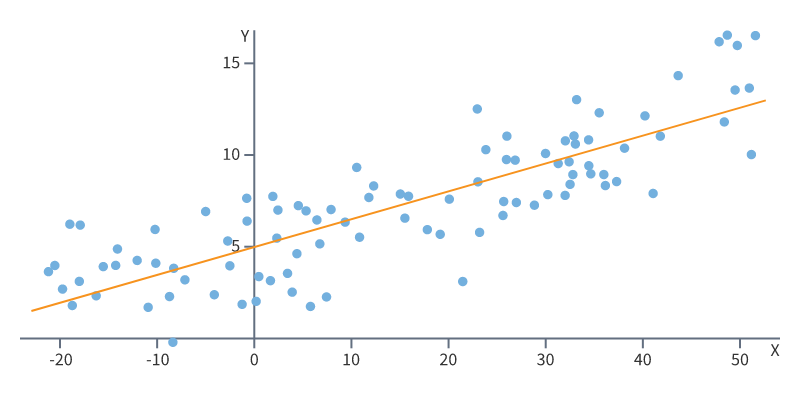

### **Нахождение коэффициентов линейной модели регрессии**

При этом задача нахождения этих коэффициентов в общем случае решается в виде:

$$
\sum_{i = 1}^{m} \left( \hat{y}(x_i, a, b) - y_i \right)^2 \to \underset{a, b}{min}.
$$

Тогда для её решения приходится решить СЛАУ:

$$
\left\{
\begin{matrix}
\cfrac{\partial \sum_{i = 1}^{m} \left( \hat{y}(x_i) - y_i \right)^2}{\partial a} & = & 0 \\
\cfrac{\partial \sum_{i = 1}^{m} \left( \hat{y}(x_i) - y_i \right)^2}{\partial b} & = & 0
\end{matrix}
\right.
\quad  \to \quad
\left\{
\begin{matrix}
2 \cdot \sum \limits_{i = 1}^{m} \left[ \left( a \cdot x_i + b - y_i \right) \cdot (x_i) \right] & = & 0 \\
2 \cdot \sum\limits_{i = 1}^{m} \left[ \left( a \cdot x_i + b - y_i \right) \cdot (1) \right] & = & 0
\end{matrix}
\right.
$$

$$
\left\{
\begin{matrix}
\sum \limits_{i = 1}^{m} ax_i^2 + \sum \limits_{i = 1}^{m} bx_i - \sum \limits_{i = 1}^{m} y_i = 0 \\
\sum \limits_{i = 1}^{m} ax_i + \sum \limits_{i = 1}^{m} b - \sum \limits_{i = 1}^{m} y_i = 0
\end{matrix}
\right.
\quad \to \quad
\begin{pmatrix}
\sum\limits_{i=1}^{m} x_i^2 & \sum\limits_{i=1}^{m} x_i \\
\sum\limits_{i=1}^{m} x_i & \sum\limits_{i=1}^{m} 1
\end{pmatrix} \cdot 
\begin{pmatrix}
a \\
\ \\
b \\
\end{pmatrix} = 
\begin{pmatrix}
\sum\limits_{i=1}^{m} y_i \\
\sum\limits_{i=1}^{m} y_i
\end{pmatrix}
$$


Либо также коэффициенты можно найти с помощью метода градиентного спуска:

$$
\begin{pmatrix}
a^{k+1} \\ 
b^{k+1}
\end{pmatrix} 
=
\begin{pmatrix}
a^{k} \\ 
b^{k}
\end{pmatrix} - \alpha \cdot
\begin{pmatrix} 
\frac{\partial \sum_{i = 1}^{m} \left( \hat{y}(x_i) - y_i \right)^2}{\partial a} \\
\frac{\partial \sum_{i = 1}^{m} \left( \hat{y}(x_i) - y_i \right)^2}{\partial b}
\end{pmatrix},
$$

$$
\ 
$$

$$
\begin{pmatrix}
a^{k+1} \\ 
b^{k+1}
\end{pmatrix} 
=
\begin{pmatrix}
a^{k} \\ 
b^{k}
\end{pmatrix} - \alpha \cdot
\begin{pmatrix} 
2 \cdot \sum \limits_{i = 1}^{m} \left[ \left( a^k \cdot x_i + b^k - y_i \right) \cdot (x_i) \right]\\
2 \cdot \sum\limits_{i = 1}^{m} \left[ \left( a^k\cdot x_i + b^k - y_i \right) \cdot (1) \right]
\end{pmatrix},
$$

где $a_0, b_0\ -$ пара случайно заданных постоянных значений, а $\alpha \ -$ постоянная скорости спуска

### **Граф вычислений линейной модели**

По описанному выше принципу можно записать модель линейной регрессии в виде простого графа вычислений:

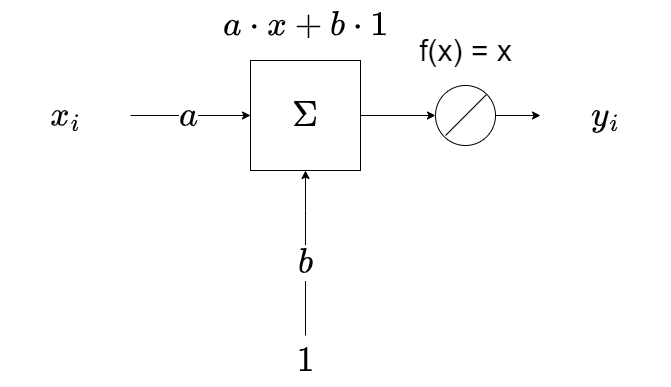

## **Пример работы линейной регрессии на одну переменную**

Зададим начальную зависимость для тестирования решения задачи СЛАУ, показанной выше. По заданной зависимости найдем коэффициенты линейной модели и отобразим её на графике

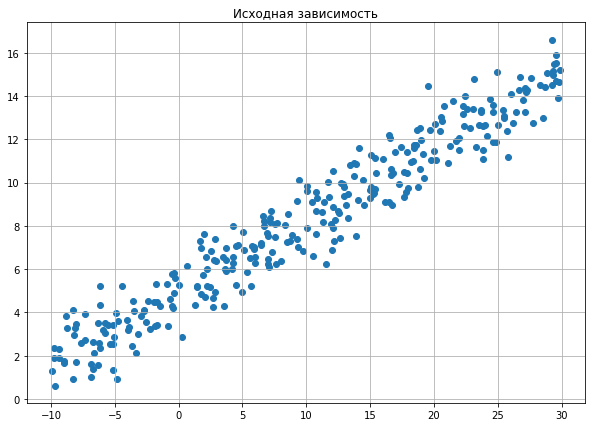

In [2]:
# Дана выборка данных
# Переменная X
np.random.seed(123)
n = 300
x_vector = np.random.uniform(-10, 30, n)

# Переменная Y
a_coeff = 1/3
b_coeff = 5
random_noise = np.random.normal(0, 1, n)
y_vector = x_vector * a_coeff + b_coeff + random_noise 

plt.figure(figsize = (10, 7))           # Размер графика
plt.title("Исходная зависимость")       # Подпись графика
plt.scatter(x_vector, y_vector)         # Построение графика разброса Y от X по таблице
plt.show()                              # Показать график

Зададим функцию поиска коэффициентов линейной зависимости по МНК с помощью метода градиентного спуска:

In [3]:
def single_LM(X_vector, Y_vector,             # Векторы переменных
              alpha = 10e-6,                  # Скорость спуска
              params_init = np.array([0.1, 0.1]), # Начальные значения параметров модели
              max_iter = 10000,               # Максимальное число итераций
              eps = 10e-7):                   # Точность сходимости градиентного метода
  
  n = X_vector.shape[0]                       # Число входных строк данных
  # Формирование матрицы данных и вектора-столбца откликов
  X_matrix = np.hstack([np.ones((n, 1)), X_vector.reshape(n, -1)])      
  Y_matrix = Y_vector.reshape(-1, 1)

  params_init = params_init.reshape(-1, 1)    # Вектор-столбец параметров
  params_new = params_init * 1.0              # Копия массива
  params_history = []                         # История итераций

  # Итерации градиентного спуска    
  for iter in range(max_iter):
    # Вектор-столбец производных
    deriv = X_matrix.T @ (X_matrix @ params_init - Y_matrix)
    # Вектор-столбец параметров
    params_new = params_init - alpha * 2 * deriv
    params_history.append(params_new.reshape(-1, ))
    # Проверка на сходимость
    if np.max(np.abs(params_new - params_init)) < eps:
      break
    # Сохранение на итерации
    params_init = params_new
  
  return params_new.reshape(-1, ), params_history

Найдем параметры линейной модели и отобразим результат

In [4]:
params, history_params = single_LM(x_vector, y_vector)    # Найдем параметры линейной модели
y_model = params[0] + params[1] * x_vector                # Построим прямую зависимости

params          # Отобразим параметры

array([4.9359763 , 0.33514029])

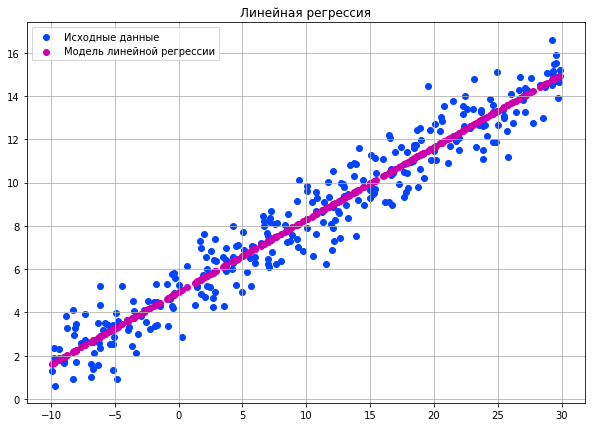

In [5]:
plt.figure(figsize = (10, 7))                  # Размер графика
plt.title("Линейная регрессия")                # Подпись графика
plt.scatter(x_vector, 
            y_vector,
            c = "#0044FF",
            label = "Исходные данные")          # Построение графика разброса Y от X по таблице
plt.scatter(x_vector, 
         y_model, 
         c = "#CC00AA",
         label = "Модель линейной регрессии")   # Линия
plt.legend()                                    # Отобразить легенду
plt.show()                                      # Показать график

Покажем графиком также разные реализации модели по ходу реализации градиентного спуска:

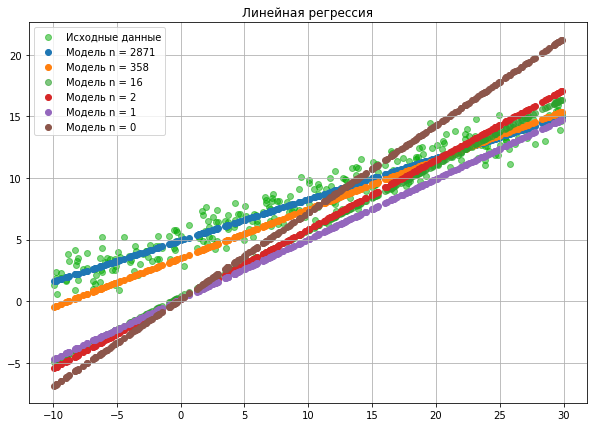

In [6]:
N_iter = len(history_params)

plt.figure(figsize = (10, 7))                  # Размер графика
plt.title("Линейная регрессия")                # Подпись графика
plt.scatter(x_vector, 
            y_vector,
            c = "#00AA00",
            alpha = 0.5,
            label = "Исходные данные")          # Построение графика разброса Y от X по таблице
plt.scatter(x_vector, 
         x_vector * history_params[N_iter - 1][1] + history_params[N_iter - 1][0],
         label = f"Модель n = {N_iter - 1}")           
plt.scatter(x_vector, 
         x_vector * history_params[(N_iter - 1) // 8][1] + 
         history_params[(N_iter - 1)//8][0],
         label = f"Модель n = {(N_iter - 1) // 8}")     
plt.scatter(x_vector, 
         x_vector * history_params[16][1] + 
         history_params[16][0],
         label = f"Модель n = {16}",
         alpha = 0.6)                                                       
plt.scatter(x_vector, 
         x_vector * history_params[2][1] + 
         history_params[2][0],
         label = f"Модель n = {2}")        
plt.scatter(x_vector, 
         x_vector * history_params[1][1] + 
         history_params[1][0],
         label = f"Модель n = {1}")                              
plt.scatter(x_vector, 
         x_vector * history_params[0][1] + 
         history_params[0][0],
         label = f"Модель n = {0}")                                
plt.legend()                                    # Отобразить легенду
plt.show()                                      # Показать график

Для валидации качества полученной модели регрессии необходимо проделать несколько важных статистических проверок. Для проверки силы линейной связи модели и данных необходимо провести замер метрики коэффициента детеминации $R^2$:

$$
R^2(y, \hat{y}) = 1 - \cfrac{\sum \limits_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum \limits_{i=1}^{m} (y_i - \overline{y})^2}.
$$

Данный коэффицент позволяет определить в долях наскоько модель $\hat{y}$ аппроксимирует данные лучше, чем если бы мы аппрокимировали данные моделью среднего $\overline{y}$ исходных данных.

- Значения коэффициента в случае исползования линейной модели изменяются в пределах: $R^2 \in [0, 1]$.
- Значения коэффициента в случае исползования нелинейной модели изменяются в пределах: $R^2 \in (-\infty, 1]$.

Чем ближе значение детерминации приближается к единице, тем лучше линейная связь модели и данных, тем лучше наша модель решает задачу.

Оценим коэффициент детерминации между моделью и реальными значениями

In [7]:
det_coeff = 1 - sum((y_vector - y_model)**2) / sum((y_vector - np.mean(y_vector))**2)
det_coeff.round(3)      # Округлим его

0.937

Второй важный шаг это проверка распределения остатков. Распределение остатков должно иметь как минимум нулевое среднее. В таком случае мы можем судиь о полноте модели.

Подчинение модели одному из известных законов распределения дает гарантию на ёмкое описание моделью исходной зависимости.

Посмотрим на распределение остатков

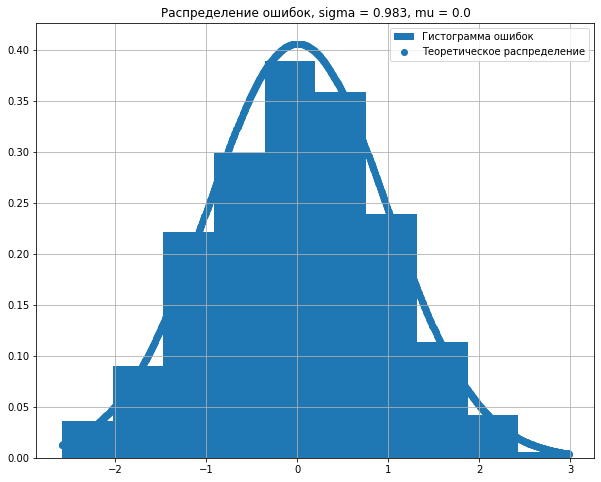

In [8]:
errors = y_vector - y_model     # Остатки

# Предположим нормальность остатков и найдем параметры
sigma_param = np.std(errors)
mu_param = np.mean(errors)
normal = lambda x: 1/np.sqrt(2 * np.pi * sigma_param ** 2) * np.exp( - (x - mu_param) ** 2/(2 * sigma_param ** 2))
grid = np.linspace(np.min(errors), np.max(errors), 1000)


plt.figure(figsize = (10, 8))
plt.hist(errors, density=True, label = "Гистограмма ошибок")
plt.scatter(grid, normal(grid), label = "Теоретическое распределение")
plt.title(f"""Распределение ошибок, sigma = {sigma_param.round(3)}, mu = {mu_param.round(3)}""")
plt.legend()
plt.show()

**Проверка значений коэффициента детерминации $R^2$ и распределения остатков необходимо проводить на тестовой выборке данных, которую модель не использовала при обучении. Только в этом случае можно гарантировать обобщающую способность модели машинного обучения.**

## **Линейная регрессия на несколько переменных**

Задача регрессии на несколько переменных ставится в случае нехватки объясняющей способности модели на одну переменную для улучшения её качества и учёта дополнительных параметров в зависимости отклика $y$ от уже нескольких переменных $x = (x_1, x_2, \dots, x_n)$. 

Такая зависимость может быть найдена только при наличии таких переменных в таблице данных. Тогда данная таблица уже будет выглядеть следующим образом:

$$
\begin{matrix}
x_1 & x_2 & \dots & x_n & y \\
\text{___} & \text{___} & \text{___} & \text{___} & \text{___}\\
x_{11} & x_{12} & \dots & x_{1n} & y_1 \\
x_{21} & x_{22} & \dots & x_{2n} & y_2\\
\dots & \dots & \dots & \dots & \dots \\
x_{m1} & x_{m2} & \dots & x_{mn} & y_2
\end{matrix}
$$

где $x_{i1}, x_{i2}, \dots, x_{in} , y_i\ -$ точечные значения переменных, при $i = 1, 2, \dots, m$.



При наличии такой таблицы данных модель $\hat{y}(x)$ можно восстановить в виде:

$$
\hat{y}(x) = w_0 + w_1 \cdot x_1 + w_2\cdot x_2 + w_3 \cdot x_3 + \dots + w_n \cdot x_n = (w, x) = w_0 + \sum \limits_{i=1}^{n} w_i \cdot x_i
$$

$$
w = (w_0, w_1, w_2,\dots, w_n),\ x = (1, x_1, x_2, \dots, x_n),
$$

где $w\ -$ линейные коэффициенты модели, а $x\ -$ наблюдаемые переменные в таблице.

### **Нахождение коэффициентов линейной регрессии на несколько переменных**

Коэффициенты линейной регрессии на несколько переменных могут быть также найдены аналитически из задачи решения системы линейных алгебрических уравнений, только уже с большим числом переменных и уравнений соответственно:

$$
\left\{
\begin{matrix}
\cfrac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w) - y_i \right)^2}{\partial w_0} = 0\\
\cfrac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w) - y_i \right)^2}{\partial w_1} =0 \\
\vdots \\
\cfrac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w) - y_i \right)^2}{\partial w_n} = 0
\end{matrix}
\right. \quad \to \quad w^{*} = \underset{w}{argmin} (\sum\limits_{i=1}^m \left( \hat{y}(x_i, w) - y_i \right)^2)
$$

Либо также с использованием метода градиентного спуска для итерационного поиска значений неизвестных параметров:

$$
\begin{pmatrix} w_0^{k+1} \\ w_1^{k+1} \\ w_2^{k+1} \\ \dots \\ w_n^{k+1}
\end{pmatrix} =
\begin{pmatrix} w_0^{k} \\ w_1^{k} \\ w_2^{k} \\ \dots \\ w_n^{k}
\end{pmatrix} - \alpha \cdot 
\begin{pmatrix}
\frac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w^k) - y_i \right)^2}{\partial w_0}\\
\frac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w^k) - y_i \right)^2}{\partial w_1} \\
\vdots \\
\frac{\partial \sum\limits_{i=1}^m \left( \hat{y}(x_i, w^k) - y_i \right)^2}{\partial w_n}
\end{pmatrix},
$$

где $k \ -$ номер итерации неизвестного вектора $w$ , при условии что значения компонент вектора $w^0 \ -$ на первом шаге итерации задается случаным образом, а парметр скорости обучения $\alpha$ подбирается исходя из критерия сходимости.

### **Пример линейной регрессии на несколько переменных**

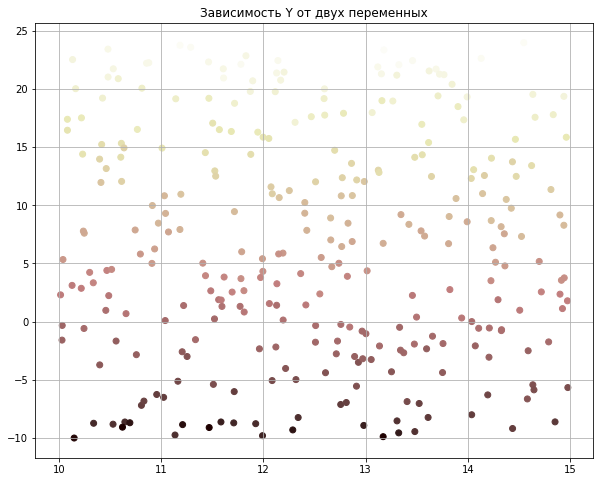

In [9]:
# Дана зависимость Y от двух переменных x_1 и x_2
N = 300
np.random.seed(123)
x_vec1 = np.random.uniform(10, 15, N)
x_vec2 = np.random.uniform(-10, 24, N)
y_vec = 0.68 * x_vec1 + 1.78 * x_vec2 - 19.06 + np.random.normal(0, 1.35, N)

plt.title("Зависимость Y от двух переменных")
plt.scatter(x_vec1, x_vec2, c = y_vec)

In [10]:
# Функция обучения на основе нормального уравнения
def LM_norm(X_matrix, y_vec):
  w_col = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_vec.reshape(-1, 1)
  return w_col

In [11]:
# Модель линейной регрессии с одной переменной
X1_model = np.hstack([np.ones((N, 1)), x_vec1.reshape(-1, 1)])
w1_params = LM_norm(X1_model, y_vec)
print(w1_params)

[[-2.72355179]
 [ 0.35100327]]


In [12]:
# Модель на данных
y1_pred = (X1_model @ w1_params).reshape(-1)

# Коэффициент детерминации
1 - sum((y_vec - y1_pred)**2) / sum((y_vec - np.mean(y_vec))**2)

0.000809025647234507

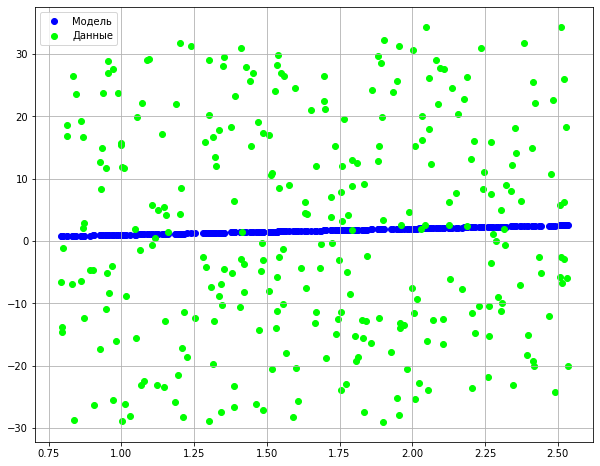

In [13]:
plt.scatter(y1_pred, y1_pred, c = "#0000FF", label = 'Модель')
plt.scatter(y1_pred, y_vec, c = "#00FF00", label = 'Данные')
plt.legend()

In [14]:
# Модель линейной регрессии с двумя переменными

X2_model = np.hstack([np.ones((N, 1)), x_vec1.reshape(-1, 1), x_vec2.reshape(-1, 1)])
w2_params = LM_norm(X2_model, y_vec)
y2_pred = (X2_model @ w2_params).reshape(-1)

In [15]:
1 - sum((y_vec - y2_pred)**2) / sum((y_vec - np.mean(y_vec))**2)

0.9939045401580777

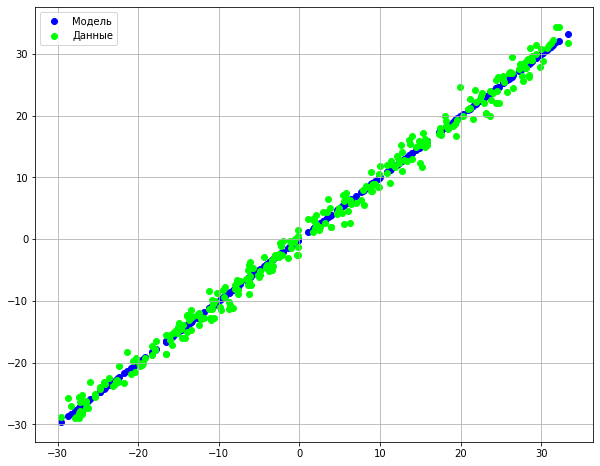

In [16]:
plt.scatter(y2_pred, y2_pred, c = "#0000FF", label = 'Модель')
plt.scatter(y2_pred, y_vec, c = "#00FF00", label = 'Данные')
plt.legend()

## **Нелинейная регрессия**

Нелинейная регрессия $-$ понятие, обобщающее принцип регрессионного анализа. Нелинейная регрессия в общем смысле рассматривет многомерную регрессионную задачу с нелинейными преобразованиями над переменными в качестве новых переменных.

Нелинейная регрессия на одну переменную восстанавливает зависимость $y \sim x$ в виде предполагаемой модели $\hat{y}(x)$, представляемой в виде линейной комбинации нелинейных функций от переменных с постоянными коэффициентами:

$$\ $$
$$
\hat{y}(x) = a \cdot g(x, p) + b \approx y(x),
$$

где $a, b\ -$ постоянные коэффициенты прямой, $p = (p_1, p_2, \dots, p_m)\ -$ постоянные коэффициенты нелинейной модели

$$\ $$
При этом задача нахождения этих коэффициентов в общем случае решается в виде:

$$
\sum_{i = 1}^{n} \left( \hat{y}(x_i) - y_i \right)^2 \to \underset{a, b, p}{min}.
$$

Тогда для её решения приходится решить СНАУ:

$$
\left\{
\begin{matrix}
\cfrac{\partial \sum_{i = 1}^{n} \left( \hat{y}(x_i) - y_i \right)^2}{\partial a} & = & 0 \\
\cfrac{\partial \sum_{i = 1}^{n} \left( \hat{y}(x_i) - y_i \right)^2}{\partial b} & = & 0 \\
\cfrac{\partial \sum_{i = 1}^{n} \left( \hat{y}(x_i) - y_i \right)^2}{\partial p_1} & = & 0 \\
\vdots & \vdots & \vdots \\
\cfrac{\partial \sum_{i = 1}^{n} \left( \hat{y}(x_i) - y_i \right)^2}{\partial p_m} & = & 0
\end{matrix}
\right.
$$


Либо искать параметры в общем виде с применением метода градиентного спуска, что является более простым решением:

$$
w^{k+1} = w^{k} - \alpha \cdot ∇_{w} \sum_{i=1}^{n}(\hat{y}(x_i, w^k) - y_i)^2
$$

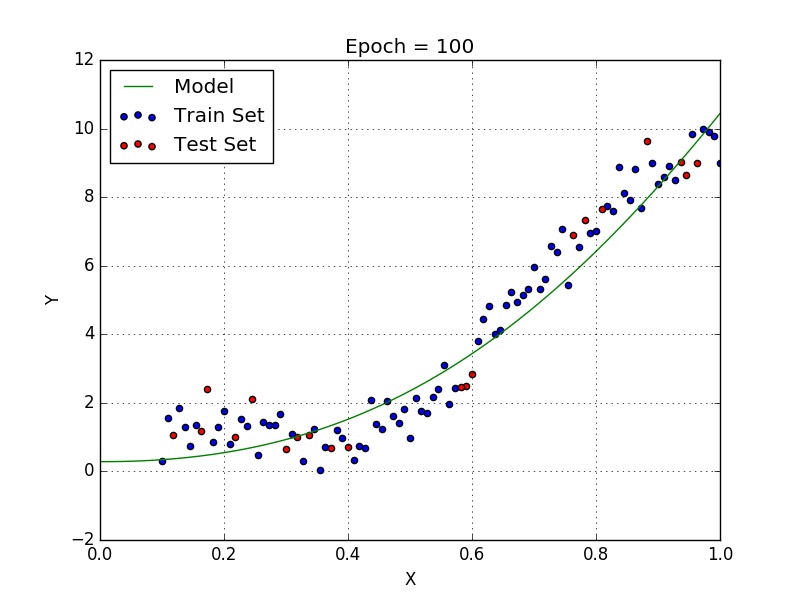

В случае с нелинейным зависимостями на несколько переменных можно предполагать в модели зависимость от нелинейных комбинаций переменных в простом виде:

**К примеру**:

$$
\hat{y}(x) = w_0 + w_1 \cdot x_1 + w_2 \cdot x_1^2 + w_3 \cdot ln(x_2) + w_4 \cdot sin(x_3) + w_5 \cdot x_2 \cdot x_3 + \dots,
$$

где $w = (w_0, w_1, w_2, \dots)\ -$ линейные параметры нелинейной зависимости.

## **Пример на нелинейную регрессию**

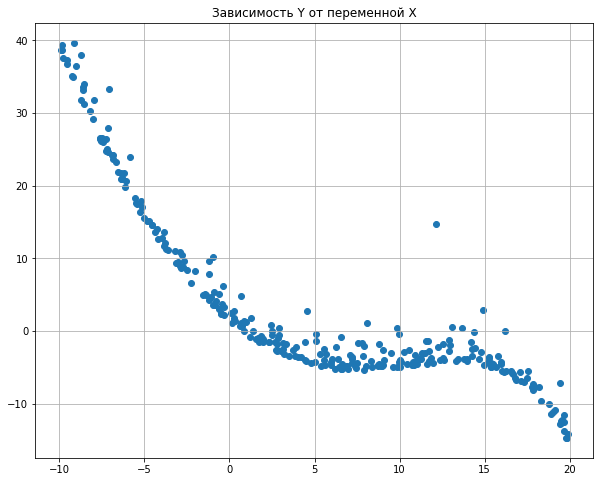

In [17]:
# Дана таблица зависимости
N = 300
np.random.seed(123)
x_vec = np.random.uniform(-10, 20, N)
y_vec = 4.05 - 1.5 * x_vec + 0.2 * x_vec**2 - np.exp(0.16 * x_vec + 1.05) + np.random.lognormal(0, 1, N)

plt.title("Зависимость Y от переменной X")
plt.scatter(x_vec, y_vec)

In [18]:
# Смоделируем зависимость на полином третьей степени:
X_poly3 = np.hstack([np.ones((N, 1)), 
                      x_vec.reshape(-1, 1), 
                      (x_vec**2).reshape(-1, 1),
                      (x_vec**3).reshape(-1, 1)])
w3_params = LM_norm(X_poly3, y_vec)
print(w3_params, end = "\n")

[[ 2.2728516 ]
 [-1.64790779]
 [ 0.17458925]
 [-0.00636107]]


In [19]:
y3_pred = (X_poly3 @ w3_params).reshape(-1)
1 - sum((y_vec - y3_pred)**2) / sum((y_vec - np.mean(y_vec))**2)

0.9733945729404591

In [20]:
# Смоделируем зависимость на полином четвертой степени:
X_poly4 = np.hstack([np.ones((N, 1)), 
                     x_vec.reshape(-1, 1), 
                     (x_vec**2).reshape(-1, 1),
                     (x_vec**3).reshape(-1, 1),
                     (x_vec**4).reshape(-1, 1)])
w4_params = LM_norm(X_poly4, y_vec)
print(w4_params, end = "\n")

[[ 2.33258006e+00]
 [-1.97476389e+00]
 [ 1.82740883e-01]
 [-1.72583837e-03]
 [-2.26571915e-04]]


In [21]:
y4_pred = (X_poly4 @ w4_params).reshape(-1)
1 - sum((y_vec - y4_pred)**2) / sum((y_vec - np.mean(y_vec))**2)

0.9784690936756204

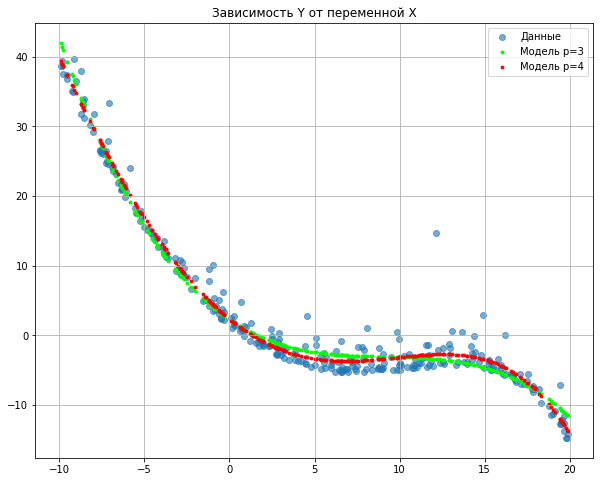

In [22]:
plt.title("Зависимость Y от переменной X")
plt.scatter(x_vec, y_vec, label = "Данные", alpha = 0.6)
plt.scatter(x_vec, y3_pred, c = "#00FF00", label = "Модель p=3", s = 8)
plt.scatter(x_vec, y4_pred, c = "#FF0000", label = "Модель p=4", s = 8)
plt.legend()
plt.show()

# **Общая модель линейной регрессии**

Модель линейной регрессии связывает предикторы $X = (1, x_1, x_2, \dots, x_{n-1}, x_n)$ c откликами $Y = (y_1, y_2, \dots, y_{k-1}, y_k)$ в общем случае посредством системы линейных комбинаций предикторов:

$$
\hat{y_1}(u, x) = u_{01} + u_{11} \cdot x_1 + u_{21} \cdot x_2 + \dots + u_{n1} \cdot x_n
$$

$$
\hat{y_2}(u, x) = u_{02} + u_{12} \cdot x_1 + u_{22} \cdot x_2 + \dots + u_{n2} \cdot x_n
$$

$$ … $$

$$
\hat{y_k}(u, x) = u_{0k} + u_{1k} \cdot x_1 + u_{2k} \cdot x_2 + \dots + u_{nk} \cdot x_n
$$

где

- $x_i \in \mathbb{R}^{m},\ i=\overline{0,n}\ -$ предикторы-столбцы матрицы данных $X_{m,n+1}$, с добавленным фиктивным столбцом единиц $\ x_0 = (1, 1, \dots, 1)^T\ $ в общем случае

- $u_{ji} \in \mathbb{R},\ j=\overline{1, k},\ i=\overline{0, n} \ -$ веса $i$-го предиктора $j$-ой модели над данными.

- $y_j\ \in\ \mathbb{R}^{m},\ j=\overline{1,k}\ -$ **реальные** отклики-столбцы матрицы откликов $Y_{m,k}$

- $\hat{y}_j\ \in\ \mathbb{R},\ j = \overline{1,k} \ -$ **модели** откликов-стобцов матрицы откликов $Y_{m,k}$, веса $u_j \in \mathbb{R}^{n+1}$ которых подобраны исходя из решения следующей задачи минимизации:

$$ L(u) = || \hat{y}_j(u) - y_j ||_{L_2}^{2} \rightarrow \underset{u}{min} $$

При значении $k = 1$, задача минимизации может быть записана относительно вектора неизвестных параметров: $u = (u_0, u_1, u_2, \dots, u_n)$ при каждом из известных предикторов-столбцов $X$

Решением задачи минимизации при известных $X$ и $Y$ будет:

$$ L(u) = || Xu - Y ||_{L_2}^{2} \rightarrow \underset{u}{min} $$

$$
\cfrac{\partial L(u^{*})}{\partial u} = 0, \ \text{ или }\ grad_{u}L(u^{*}) = 0, \ \text{ или }\ ∇_{u}L(u^{*}) = 0
$$
где $u^{*} = \underset{u}{argextr}(L(u))$

$$
\ 
$$

Тогда при $k = 1$:

$$
\begin{pmatrix} 
\cfrac{\partial L(u^{*})}{\partial u_{0}}  \\
\cfrac{\partial L(u^{*})}{\partial u_{1}} \\
\cfrac{\partial L(u^{*})}{\partial u_{2}}  \\
\vdots \\
\cfrac{\partial L(u^{*})}{\partial u_{n}} 
\end{pmatrix} = \begin{pmatrix} 
\ \\
0 \\
\ \\
0 \\
\ \\
0 \\
\ \\
\vdots \\
\ \\
0 \\
\ 
\end{pmatrix},
\quad \text{ или  }\ 
\begin{pmatrix} 
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_{0}} \\
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_{1}}\\
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_{2}}\\
\vdots \\
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_{n}} 
\end{pmatrix} = \begin{pmatrix} 
\ \\
0 \\
\ \\
0 \\
\ \\
0 \\
\ \\
\vdots \\
\ \\
0 \\
\ 
\end{pmatrix}
$$



Рассмотрим по этапам умножение матрицы предикторов $X$ на вектор неизвестных весов $u$. В итоге получим вектор модели $\hat{Y}$ на основе данных.

$$
\ 
$$
$$
\hat{Y}_{m, 1} = X_{m, (n+1)} \cdot u_{(n+1), 1} = \begin{pmatrix}
\sum_{i=0}^{n} x_{1i} \cdot u_{i} \\
\sum_{i=0}^{n} x_{2i} \cdot u_{i} \\
\sum_{i=0}^{n} x_{3i} \cdot u_{i} \\
\vdots \\
\sum_{i=0}^{n} x_{mi} \cdot u_{i}
\end{pmatrix}
$$
$$
\ 
$$

Получаем вектор элементов состоящий в умножениях строки матрицы предикторов $X$ на столбец весов модели.



Рассмотрим выражение для вектора ошибок между моделью $\hat{Y}$ и реальным откликами $Y$:

$$
\ 
$$
$$
\hat{Y}_{m, 1} - Y_{m, 1} = X_{m, (n+1)} \cdot u_{(n+1), 1} - Y_{m, 1} = \begin{pmatrix}
\left(\sum_{i=0}^{n} x_{1i} \cdot u_{i}\right) - y_1\\
\left(\sum_{i=0}^{n} x_{2i} \cdot u_{i}\right) - y_2\\
\left(\sum_{i=0}^{n} x_{3i} \cdot u_{i}\right) - y_3\\
\vdots \\
\left(\sum_{i=0}^{n} x_{mi} \cdot u_{i}\right) -
y_m
\end{pmatrix}
$$
$$
\ 
$$

Учитывая, что норма Евклидова пространства вещественнозначных векторов $x$ размера $x \in \mathbb{R}^n$ вычисляется по формуле:

$$
||x||_{L_2} = \sqrt{(x, x)} = \sqrt{\sum_{i=1}^{n} x_i^2}
$$

То для квадрата нормы вектора ошибок модели и откликов запишем следующее выражение:

$$
\ 
$$


$$
|| Xu^{*} - Y ||_{L_2}^{2} = \sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)^2
$$

$$
\ 
$$


Рассчитаем значение производной последнего выражения относительно неизвестного значения $u_k$ - компоненты вектора неизвестных параметров линейной модели:

$$
\ 
$$

$$
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_k} = \cfrac{\sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)^2}{\partial u_k}
$$
$$
\cfrac{\partial \sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)^2}{\partial u_k} = 
\cfrac{ \partial \sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)^2}{\partial \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)} \cdot \cfrac{\partial \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)}{\partial u_k}
$$

где

$$
\cfrac{ \partial \sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)^2}{\partial \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)} = 2 \sum_{j=1}^{m} \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)
$$

$$
\cfrac{\partial \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right)}{\partial u_k} = x_{jk}
$$

$$
\ 
$$
Тогда получим:
$$
\ 
$$

$$
\cfrac{\partial || Xu^{*} - Y ||_{L_2}^{2}}{\partial u_k} = 2 \cdot \sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{jk} \right]
$$

По полученному выражению для производной по функции ошибок получим следующее равенство
$$
\begin{pmatrix} 
\cfrac{\partial L(u^{*})}{\partial u_{0}}  \\
\cfrac{\partial L(u^{*})}{\partial u_{1}} \\
\cfrac{\partial L(u^{*})}{\partial u_{2}}  \\
\vdots \\
\cfrac{\partial L(u^{*})}{\partial u_{n}} 
\end{pmatrix} = 
\begin{pmatrix} 
2 \cdot \sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{j0} \right]  \\
\ \\
2 \cdot \sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{j1} \right] \\
\ \\
2 \cdot \sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{j2} \right]  \\
\ \\
\vdots \\
\ \\
2 \cdot \sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{jn} \right] 
\ \\
\end{pmatrix}
=
\begin{pmatrix} 
\ \\
0 \\
\ \\
0 \\
\ \\
0 \\
\ \\
\vdots \\
\ \\
0 \\
\ 
\end{pmatrix}
$$

Полученное равенство является расширенной записью уравнения для поиска аргумента, доставляющего экстремум линейному функционалу $|| Xu^{*} - Y ||_{L_2}^{2}$. Запишем его в виде уравнения относительно умножения матрицы на вектор. Внутренние суммы $\sum_{j=1}^{m} \left[ \left( \sum_{i=0}^{n} \left( x_{ji} \cdot u_{i} \right) - y_{j} \right) \cdot x_{jk} \right]\ -$ умножения вектора-строки ошибок между моделью и откликами $e=Xu-Y$ и вектора-столбца матрицы данных $X$. Таким образом получаем возможность расписать данное выражение в двух видах:

$$
(Xu - Y)^T \cdot X = 0,\quad \text{или }\quad X^T \cdot (Xu - Y) = 0
$$


Рассмотрим следующее уравнение:

$$
\ 
$$

$$
2 \cdot X^T \cdot (X\cdot u - Y) = 0 \ |\ :2
$$

$$
\ 
$$

Распишем его относительно размеров векторов и матриц для того чтобы убедиться в справедливости операции, предварительно разделив на константу обе части равенства:

$$
\ 
$$

$$
(X^T)_{(n+1, m)} \cdot (X_{m, (n+1)}\cdot u_{(n+1), 1} - Y_{m, 1}) = 0_{(n+1), 1}
$$

$$
\ 
$$

Решим уравнение относительно неизвестного вектора весов модели $u = (u_0, u_1, \cdot, u_n)$:

$$
X^T \cdot (X\cdot u - Y) = 0,
$$

$$
X^T \cdot X\cdot u -  X^T \cdot Y = 0,
$$

$$
(X^T \cdot X)\cdot u =  (X^T \cdot Y).
$$

Если $A = X^T \cdot X\ -$ квадратная матрица ковариаций исходной матрицы предикторов, а $f = (X^T \cdot Y)\ -$ вектор свободных членов уравнения, то данное равенство можно расценивать как СЛАУ относительно неизвестного вектора, и его решение:

$$u = (X^T \cdot X)^{-1} \cdot X^T \cdot Y.$$

Данное равенство называется **нормальным уравнением**. Данное равенство является общим решением задачи аппроксимации неизвестной функции $y(x)$ заданной дискретным набором значений $Y$ с помощью матрицы зависимых переменных, относительно которых восстанавливается линейная зависимость. 

Данное уравнение является решением задачи **линейной регрессии** при известной матрице предикторов $X$ и матрице откликов $Y$.

# **Алгоритм обучения модели регрессии на основе градиентного метода**

## **План обучения**

Процесс обучения модели регрессии с применением градиентных методов состоит из нескольких стадий:

1. **Постановка модели обобщающей зависисмости $\hat{y}(x)$**.
2. **Постановка минимизирующей метрики**:
- $SSE(y, \hat{y}) = \sum\limits_{i=1}^m \left(\hat{y}(x_i) - y_i\right)^2$
- $MSE(y, \hat{y}) = \cfrac{1}{2m}\sum\limits_{i=1}^m \left(\hat{y}(x_i) - y_i\right)^2$
- $RMSLE(y, \hat{y}) = \cfrac{1}{2m}\sum\limits_{i=1}^m \left(log(\hat{y}(x_i) + 1) - log(y_i + 1)\right)^2$
- $MAE(y, \hat{y}) = \cfrac{1}{m} \sum\limits_{i=1}^m \left| \hat{y}(x_i) - y_i \right|$
- ...
3. **Выбор метода оптимизации**:
- Метод стохастического градиентного спуска (SGD)
- Метод градиентного спуска с моментом (MomentumSGD)
- AdaGrad
- RMSProp
- Adam
- ...
4. **Выбор пакетного оптимизатора**:
- Оценка градиента по ошибке одной записи
- Оценка градиента по ошибке небольшой группы записей (пакетный спуск)
- Оценка градиента по ошибке на всей обучающей выборке
5. **Подбор гиперпараметров метода оптимизации**.
6. **Получение модели с минимизированными коэффициентами**.

## **Постановка модели зависимости**

Процесс подбора обобщающей зависимости - итеративный процесс проб и ошибок, либо процесс тщательного отбора признаков на основе статистических метрик и исследования зависимостей на основе визуализаций и тестирования гипотез о зависимости данных.

В основе перебора признаков стоит обычный эвристический алгоритм предположения наилучшей связки признаков для решения задачи аппроксимации зависимости наилучшим образом.

В процессе отбора признаков на основе статистических критериев, метрик и тестов огромную часть исследования занимает **метод исследования линейных зависимостей признаков** друг относительно друга и отклика относительно признаков. Данное исследование проводится на основе измерения линейной корреляции признаков по критерию линейной корреляции **Пирсона**, корреляции **Спирмена** и других метрик корреляций между признаками разных типов данных.

Критерии отбора признаков в модели регрессии на основе корреляциооного анализа

- Чем выше по модулю значение линейной корреляции между признаками модели $-$ тем менее вариативной будет сама модель, а также тем хуже будет данная модуль обучаться на данных в силу высокой линейной связи между столбцами матрицы данных, и как следствие слабая обусловленность задачи $\to$ задача минимизации решаться не будет.

- Чем выше по модулю значение линейной корреляции между признаком и откликом, тем более результативным будет его включение в модель линейной регрессии, тем лучше будет модель обобщать итоговую зависимость.

**Корреляционный анализ** эффективно проводится на основе построения матрицы корреляции данных. Для построения корреляционной матрицы по таблице данных в pandas можно воспользоваться следующей функцией: 

In [23]:
#df = pd.read_csv("./content/sample_data/california_housing_train.csv")
#corr_matrix = df.corr()   # Корреляционная матрица данных

#corr_matrix

В каждом элементе матрицы корреляций на пересечении $i$-ой строки и $j$-ого столбца стоит коэффициент корреляции Пирсона между признаком $x_i$ и $x_j$.

## **Метрики минимизации - Loss-функции**



Loss-функции нужны для постановки задачи минимизации и обозначают тот критерий, по которому модель должна работать лучше всего.

Loss-функция численно показывает как хорошо одна модель относительно другой модели решает задачу машинного обучения. Чем меньше значение Loss-функции для модели, тем лучше задача машинного обучения решается обученной моделью.

Существует множество классических минимизируемых Loss-функций для решения задачи регресии, по которым мы ищем оптимальные параметры:

**Сумма квадратов ошибок**
$$Loss(y, \hat{y}(x, w)) = SSE(y, \hat{y}(x, w)) = \sum\limits_{i=1}^m \left(\hat{y}(x_i, w) - y_i\right)^2$$
классическая функция потерь для решения задачи оптимизации модели регрессии, подвержена большим выбросам.

**Среднее квадратов ошибок**
$$Loss(y, \hat{y}(x, w)) = MSE(y, \hat{y}(x, w)) = \cfrac{1}{2m}\sum\limits_{i=1}^m \left(\hat{y}(x_i, w) - y_i\right)^2$$
функция потерь, нормируемая количеством значений в выборке данных, менее подвержена выбросам, поэтому более стабильна.

**Среднее квадратов логарифмов ошибок**
$$Loss(y, \hat{y}(x, w)) = RMSLE(y, \hat{y}(x, w)) = \cfrac{1}{2m}\sum\limits_{i=1}^m \left(log(\hat{y}(x_i, w) + 1) - log(y_i + 1)\right)^2$$
функция потерь для минимизации параметров нелинейных экспоненциальных моделей, а также для экспоненциально растущих зависимостей.

**Среднее модулей ошибок**
$$Loss(y, \hat{y}(x, w)) = MAE(y, \hat{y}(x, w)) = \cfrac{1}{m} \sum\limits_{i=1}^m \left| \hat{y}(x_i, w) - y_i \right|$$
имеет постоянный градиент, поэтому менее гибок в решении задачи оптимизации параметров модели.

Loss-функции напрямую участвуют в алгоритме оптимизации как функция, указывающая на минимум ошибок при взятии отрицательного градиента от нее. Поэтому скорость и простота взятия градиента также важны, как и абсолютные значения градиента.

## **Методы оптимизации**

Методы оптимизации сильно влияют на скорость и качество сходимости параметров моделей к минимуму функции потерь на пространстве параметров.

Классический метод оптимизации:

**Стохастический градиентный спуск**

$$
w^{k+1} = w^{k} - \alpha \cdot \nabla_w Loss\left(y, y(x, w^k)\right),
$$
где $\nabla_w\ -$ градиент по вектору весов модели регрессии, $w^k\ -$ вектор весов модели регрессии на $k$-ом шаге итерации, $\alpha\ -$ параметр скорости сходимости. 

Данный метод для классической функции $SSE$ был реализован ранее.



## **Метод пакетной оптимизации**

Метод пакетной оптимизации предполагает подсчет одного градиентного шага не по сумме ошибок по всем элементам тренировочной выборки сразу, а по небольшому числу таких элементов - пакету записей. В данной ситуации в рамках градиентных методов формируется мини-пакетный градиентный метод.

Задача мини-пакетной оптимизации ставится из расчета на то, что при большом числе данных, по выборке небольшого числа значений из этих данных в среднем направление градиента функции ошибок окажется схожим общему направлению функции ошибок во всем исходным данным.

Рассмотрим мини-пакетный градиентный метод на основе минимизации метрики $MSE$:

Путь выборка $(X, Y)\ -$ выборка признаков и откликов имеет $m$ строк данных. Пакеты определим размером $b \in [1, m]$. Тогда мини-пакентый градиентный спуск для решения задачи оптимизации параметров задачи регерессии выглядит так:

$$
w^{k+1} = w^{k} - \alpha  \cfrac{1}{2 \cdot b} \nabla_w \left[ \sum\limits_{i=1}^{b} \left( y(x_i, w^{k}) - y_i \right)^2 \right]
$$

То есть производная ошибок на шаге итерации градиентного метода считается на основе вычисления ошибок только на некоторых случайно взятых $b$ значений из выборки данных $(X, Y)$.

В случае:

- $b = 1\ -$  метод стохастического градиентного спуска
- $1 < b << m\ -$  метод мини-пакетного градиентного спуска
- $b = m\ -$ метод пакетного градиентного спуска.

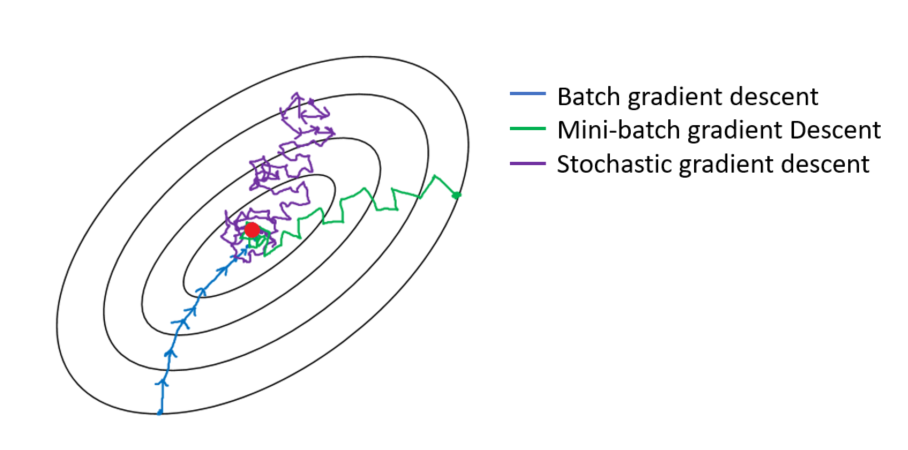

# **Переобучение**

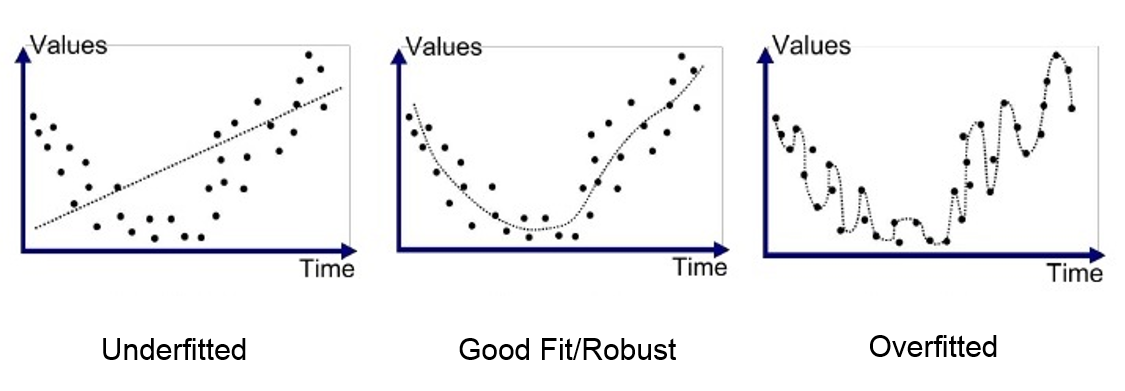

# **Алгоритм проведения регрессионного анализа**

Алгоритм действий исследователя при построении регрессионной модели (полевые работы мы, по понятным причинам, не рассматриваем - считаем, что исходные данные уже получены):

1. Подготовительный этап - постановка целей и задач исследования.

2. Первичная обработка исходных данных - об этом много написано в учебниках и пособиях по DataScience, сюда могут относится:

- выявление нерелевантных признаков (признаков, которые не несут полезной информации), нетипичных данных (выбросов), неинформативных признаков (имеющих большое количество одинаковых значений) и работа с ними (удаление/преобразование);

- выделение категориальных признаков;

- работа с пропущенными значениями;

- преобразование признаков-дат в формат datetime и т.д.

3. Визуализация исходных данных - предварительный графический анализ.

4. Дескриптивная (описательная) статистика - расчет выборочных характеристик и предварительные выводы о свойствах исходных данных.

5. Исследование закона распределения исходных данных и, при необходимости, преобразование исходных данных к нормальному закону распределения.

6. Выявление статистически аномальных значений (выбросов), принятие решения об их исключении.

Этапы 4, 5 и 6 могут быть при необходимости объединены.

7. Корреляционный анализ - исследование корреляционных связей между исходными данными; это разведка перед проведением регрессионного анализа.

8. Построение регрессионной модели:

- выбор моделей;

- выбор методов;

- оценка параметров модели.

9. Статистический анализ регрессионной модели:  

- оценка ошибок аппроксимации (error metrics);

- анализ остатков (проверка нормальности распределения остатков и гипотезы о равенстве нулю среднего значения остатков);

- проверка адекватности модели;

- проверка значимости коэффициента детерминации;

- проверка значимости коэффициентов регрессии;

- проверка мультиколлинеарности (для множественных регрессионных моделей; вообще мультиколлинеарные переменные выявляются еще на стадии корреляционного анализа);

- проверка автокорреляции;

- проверка гетероскедастичности.

Этапы 8 и 9 могут быть при необходимости повторяться несколько раз.

10. Сравнительный анализ нескольких регрессионных моделей, выбор наилучшей (при необходимости).

11. Прогнозирование с помощью регрессионной модели и оценка качества прогноза.

12. Выводы и рекомендации.

Само собой, этот алгоритм не есть истина в последней инстанции - в зависимости от особенностей исходных данных и вида модели могут возникать дополнительные задачи.

# **Решение задачи линейной регрессии с использованием sklearn**

## **Загрузка данных**

Возьмем данные из датасета **Ames Housing** с помощью функции загрузки из **scikit_learn.datasets**

In [24]:
df = datasets.fetch_openml(name="house_prices", as_frame=True)
dataframe = df['frame']

## **Исследование данных**

Просмотрим первые значения таблицы для того, чтобы удостовериться в правильности импорта столбцов и корректности определения их типов

In [25]:
# Просмотр первых строк данных
dataframe.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...      0.0   None  None        None     0.0    2.0   
1         Lvl    AllPub  ...      0.0   None  None        None     0.0    5.0   
2         Lvl    AllPub  ...      0.0   None  None        None     0.0    9.0   
3         Lvl    AllPub  ...      0.0   None  None        None     0.0    2.0   
4         Lvl    AllPub  ...      0.0   None  None        None     0.0   12.0   

   YrSold  SaleType  SaleCondition  SalePrice  
0  2008.0        WD         Normal   208500.0  
1  2007.0        WD         Normal   181500.0  
2  2008.0        WD         Normal   223500.0  
3  2006.0        WD        Abnorml   140000.0  
4  2008.0        WD         Normal   250000.0  

[5 rows x 81 columns]

Посмотрим на типы данных столбцов для определения корректности импорта данных

In [26]:
# Просмотр типов данных
print(dataframe.dtypes)

Id               float64
MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
                  ...   
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object


Переведем текстовый тип данных в категории

In [27]:
# Определим имена столбцов, тип данных которых object
objects_names = dataframe.axes[1][dataframe.dtypes == object]

# Приведем столбцы (переменные) на позициях к типу данных категорий
dataframe[objects_names] = dataframe[objects_names].astype('category')

dataframe.dtypes

Id                float64
MSSubClass        float64
MSZoning         category
LotFrontage       float64
LotArea           float64
                   ...   
MoSold            float64
YrSold            float64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

Попробуем осмотреть таблицу описательных статистик с целью:

1. Определить какие столбцы являются столбцами с числовыми данными
2. Просмотреть описательные статистики на наличие аномалий в столбцах

Находим пропуски значений в столбце **LotFrontage** и **MasVnrArea**. Необходимо также удостовериться в отсутствии пропусков в других столбцах более точными способами

In [28]:
# Описательные статистики данных
dataframe.describe().iloc[:, 1:]

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

При помощи метода **.isna()** можем определить количество пропущенных значений

In [29]:
# Количество пропущенных значений в столбцах
dataframe.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

В первый раз для демонcтрации возможностей модели регрессии мы воспользуемся только числовыми значениями столбцов.

In [30]:
# Имена числовых переменных
info_real_frame = dataframe.describe()
info_real_frame.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Можно исследовать данные столбцы на корреляцию для понимания похожести признаков друг относительно друга. Данная операция позволит избавиться от коррелированных признаков, которые будут дублировать друг друга.

In [31]:
# Отобразим полную матрицу корреляции без столбца ID
data = dataframe[info_real_frame.columns[1:]]
data.corr().style.background_gradient(cmap='coolwarm')

Также можно просмотреть корреляции с столбцом откликов для того, чтобы определить сильно линейно скоррелированные признаки, которые будут наиболее эффективны при построении модели регрессии.

In [32]:
# Отобразим корреляции признаков с откликами
sales_correlations = data.corr().iloc[-1, :-1].sort_values()
sales_correlations

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

По отсортированным столбцам по значению линейной корреляции с откликом, можем отобрать самые скоррелированные признаки, наиболее сильно влияющие на качество итоговой модели регрессии. При взятии признаков с высокой корреляцией в модель, мы сразу же можем рассчитывать на высокий показатель тестового $R^2$ при опробации модели на отложенной выборке.

Узнаем имена столбцов для того, чтобы выбрать их из основной таблицы

In [33]:
sales_predictors_labels = sales_correlations.axes[0]
print(sales_predictors_labels)

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
       'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF',
       'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea',
       'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual'],
      dtype='object')


Выделим таблицу данных с признаками и таблицу данных с откликом для разделения их при решении задачи регрессии. В матрице X будут признаки, в матрице Y будут отклики

In [34]:
# Признаки
X = dataframe[sales_predictors_labels]
# Отклики
Y = dataframe["SalePrice"]
print(X.shape)
print(Y.shape)

(1460, 36)
(1460,)


Узнаем количество пропущенных значений в столбцах матрицы признаков

In [35]:
# Пропущенные значения по столбцам
np.sum(X.isna())

KitchenAbvGr       0
EnclosedPorch      0
MSSubClass         0
OverallCond        0
YrSold             0
LowQualFinSF       0
MiscVal            0
BsmtHalfBath       0
BsmtFinSF2         0
3SsnPorch          0
MoSold             0
PoolArea           0
ScreenPorch        0
BedroomAbvGr       0
BsmtUnfSF          0
BsmtFullBath       0
LotArea            0
HalfBath           0
OpenPorchSF        0
2ndFlrSF           0
WoodDeckSF         0
LotFrontage      259
BsmtFinSF1         0
Fireplaces         0
MasVnrArea         8
GarageYrBlt       81
YearRemodAdd       0
YearBuilt          0
TotRmsAbvGrd       0
FullBath           0
1stFlrSF           0
TotalBsmtSF        0
GarageArea         0
GarageCars         0
GrLivArea          0
OverallQual        0
dtype: int64

Можем заполнить пропущенные значения при помощи либо заполнения 0, либо интерполяцией, либо с помощью заполнением значениями идущими перед ними или после них

In [36]:
#X.interpolate(Axis = 1, inplace=True)
X.fillna(method = "bfill", inplace=True)      # method : {'backfill', 'bfill', 'pad', 'ffill', None}

C:\Users\vasil\AppData\Local\Temp\ipykernel_8276\3122885099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = "bfill", inplace=True)      # method : {'backfill', 'bfill', 'pad', 'ffill', None}


In [37]:
# Пропусков больше нет
np.sum(X.isna()).sum()

0

Разделим выборку на тренировочную и тестовую для валидации качества модели регрессии.

Воспользуемся методом из библиотеки **sklearn** для деления выборки на train и test

In [38]:
seed=123
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 36)
Размер откликов для тренировки и кросс-валидации (1168,)


Можем просто обучить регрессор и посмотреть на результат на тесте, если нужно сделать беглую оценку результату отбора признаков

In [39]:
model_lm = LinearRegression()           # Объект класса
model_lm.fit(X_train, Y_train)          # Метод обучение
print("Значения весов модели линейной регресии: ", model_lm.coef_, "\n")
print("Значения R^2 на тренировочной выборке", model_lm.score(X_train, Y_train))

Значения весов модели линейной регресии:  [-9.12733448e+03  5.18016965e+00 -1.88252100e+02  3.63864091e+03
 -6.17218058e+02 -1.44130040e+01 -5.06408664e-01  2.91238913e+03
  7.68910620e-02  1.45686193e+01  6.28104330e+01 -2.05115035e+01
  3.76360754e+01 -9.51748720e+03 -1.60433374e+00  8.69153461e+03
  4.01089352e-01 -3.06793259e+03  4.87495208e-01  2.05003048e+01
  2.53333257e+01 -7.11132510e+01  1.00769343e+01  5.18683363e+03
  2.70132403e+01  9.07589127e+01  1.62597724e+02  2.69798263e+02
  4.45329291e+03  2.80686979e+03  2.13576650e+01  8.54949166e+00
 -1.44531478e+01  1.42966563e+04  2.74449658e+01  1.76091575e+04] 

Значения R^2 на тренировочной выборке 0.8038840087679193


In [40]:
preds = model_lm.predict(X_test)
R2_real = r2_score(Y_test, preds)
print("Значение R^2 на тестовой выборке", R2_real)

Значение R^2 на тестовой выборке 0.8427366312201572


Рассчитаем метрику среднего модулей ошибок между прогнозами и тестовыми значениями

$$
MAE = \cfrac{1}{N_{test}} \sum \limits_{i = 1}^{n_test} \left| \hat{y}(x_i, w) - y_i \right|
$$

In [41]:
MAE_real = mean_absolute_error(Y_test, preds)
print("Средняя ошибка прогноза цены дома в долларах:", MAE_real)

Средняя ошибка прогноза цены дома в долларах: 19168.626046679863


Построим график **"Данные ~ Модель"** для того чтобы отобразить связь между моделью и данными

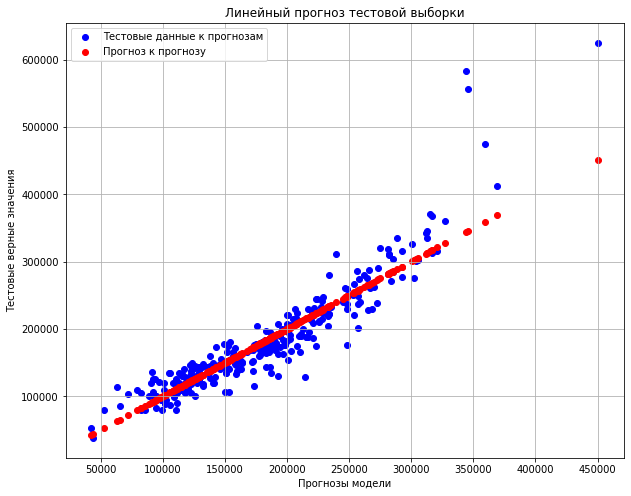

In [42]:
plt.scatter(preds, Y_test, c = 'b', label = 'Тестовые данные к прогнозам')
plt.scatter(preds, preds, c = 'r', label = 'Прогноз к прогнозу')
plt.xlabel("Прогнозы модели")
plt.ylabel("Тестовые верные значения")
plt.title("Линейный прогноз тестовой выборки")
plt.legend()
plt.show()

Также построим график остатков модели

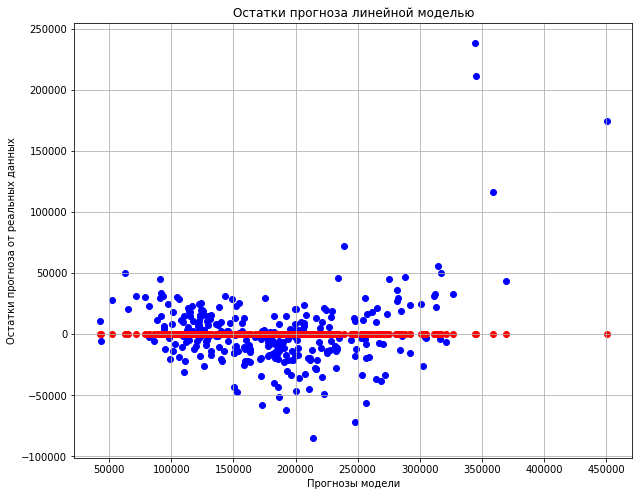

In [43]:
plt.scatter(preds, Y_test - preds, c = 'b')
plt.scatter(preds, np.zeros_like(preds), c = 'r')
plt.xlabel("Прогнозы модели")
plt.ylabel("Остатки прогноза от реальных данных")
plt.title("Остатки прогноза линейной моделью")
plt.show()

Посмотрим также на гистограмму распределения

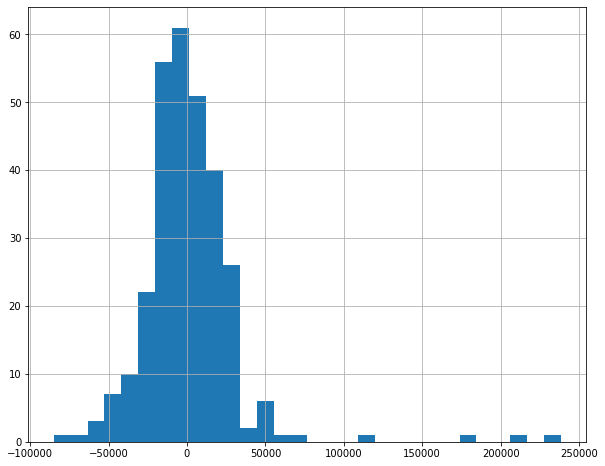

In [44]:
plt.hist(Y_test - preds, bins = 30)
plt.show()

# **Категориальные переменные при оценке параметров линейной регрессии**

Для использования категориальных переменных в качестве предикторов для модели линейной регресии имеет смысл создать новые признаки на основе одного категориального. Новые признаки будут иметь значение либо **one hot encode**, либо номеров, которыми заменяется каждая метка в категории.

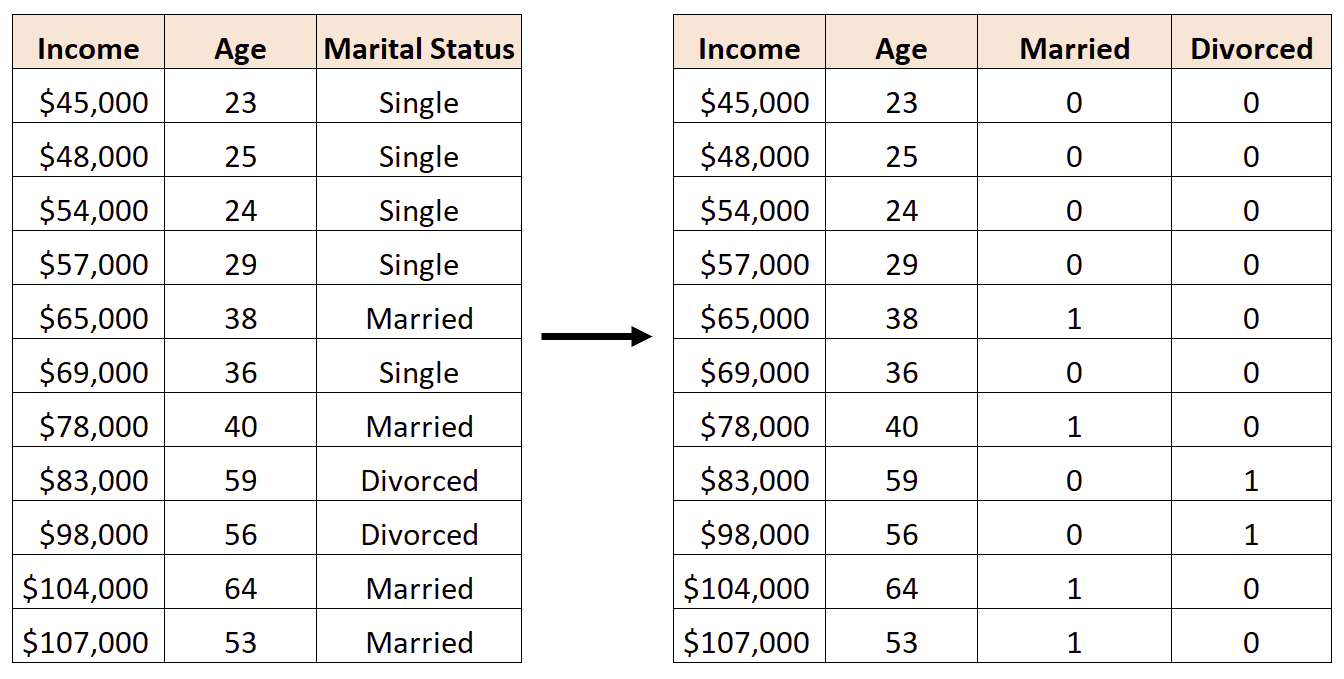

# **Регрессия Lasso и Ridge, применение кросс-валидации для оценки гиперпараметров**

Регрессия $Lasso$ и $Ridge \ -$ модели регрессии, позволяющие в полуавтоматическом режиме отбирать признаки из набора исходных признаков путём подбора коэффициентов регуляризации $\lambda$ в качестве штрафного показателя на большой рост значений весов моделей.

$$
Ridge\left(y, \hat{y}(x, w), \lambda\right) = Loss\left(y, \hat{y}(x, w)\right) + \lambda ||w||_{L_2}^2
$$

$$
Lasso\left(y, \hat{y}(x, w), \lambda\right) = Loss\left(y, \hat{y}(x, w)\right) + \lambda ||w||_{L_1}
$$

Реализация данных моделей заключается в добавлении к функции потерь дополнительной штрафной функции, которую также в композиции с $Loss$ необходимо минимизировать по параметрам модели:

$$
Ridge\left(y, \hat{y}(x, w), \lambda\right) \to \underset{w}{min}
$$

$$
Lasso\left(y, \hat{y}(x, w), \lambda\right) \to \underset{w}{min}
$$

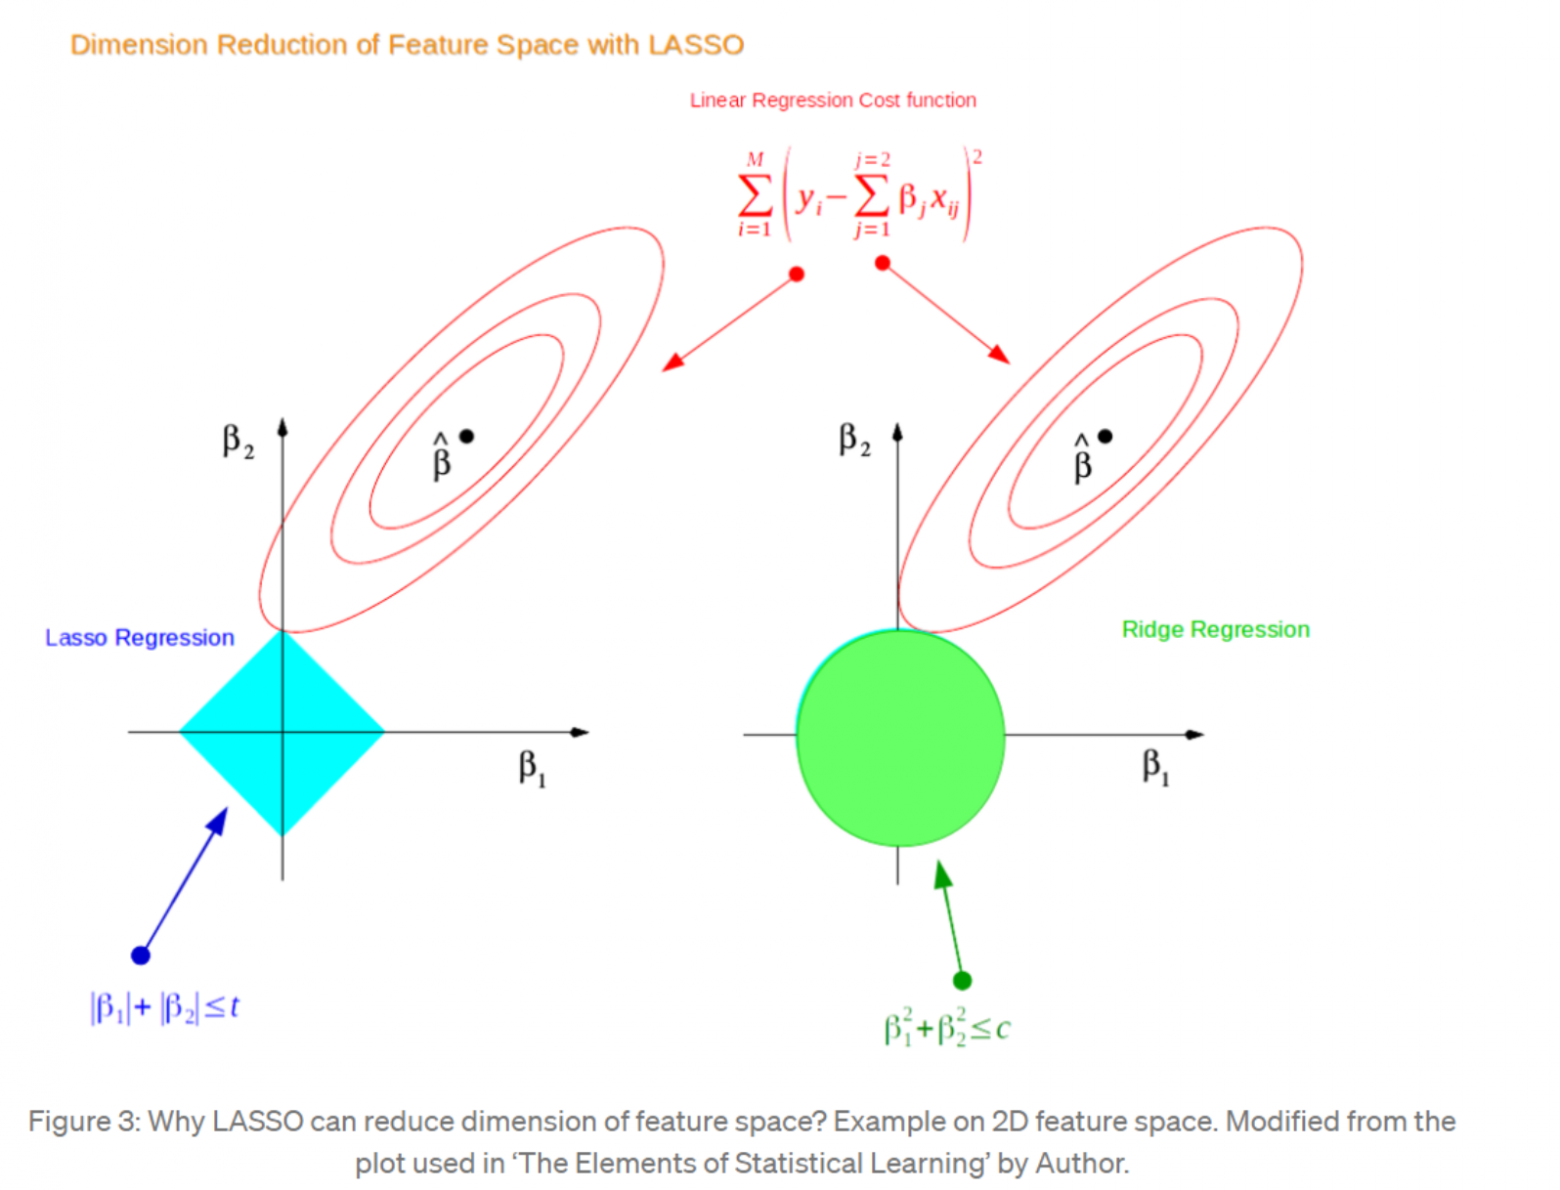

Подбор гиперпатаметров $\lambda$ оптимальных для решения задачи регрессии осуществляется в полуавтоматическом режиме на основе кросс-валидации модели на валидационных данных, которые входят в тренировочный набор:

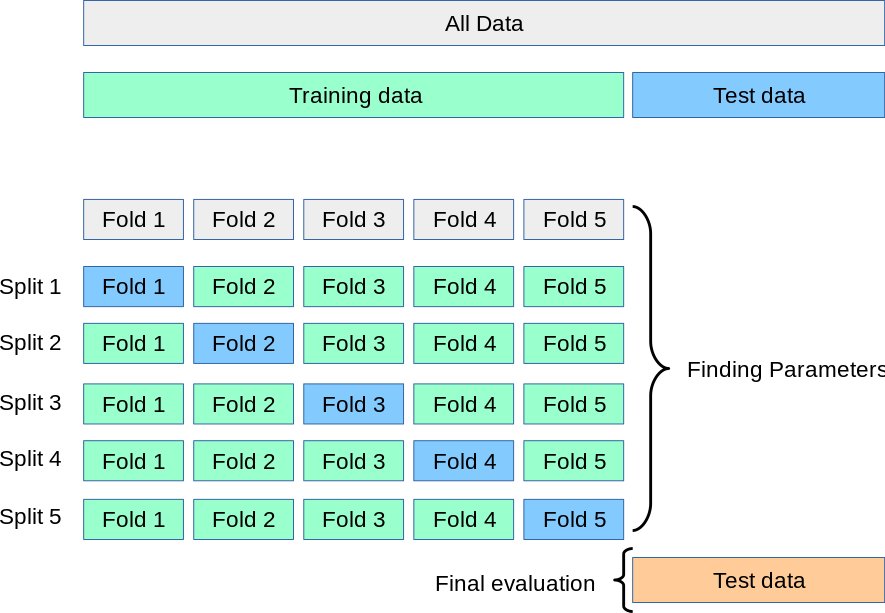

На каждом прогоне из предполагаемого набора гиерпараметров выбирается одно значение $\lambda_i$ на основе которого учится модель с новой Loss-функцией $Ridge(y,\hat{y},\lambda_i)$ или $Lasso(y,\hat{y},\lambda_i)$.

По каждой валидационной выборке оценка качества работы алгоритма усредняется и получаем ответ в среднем для гиперпараметра, какую ошибку выдает модель на тестовых данных при определенном значении $\lambda_i$

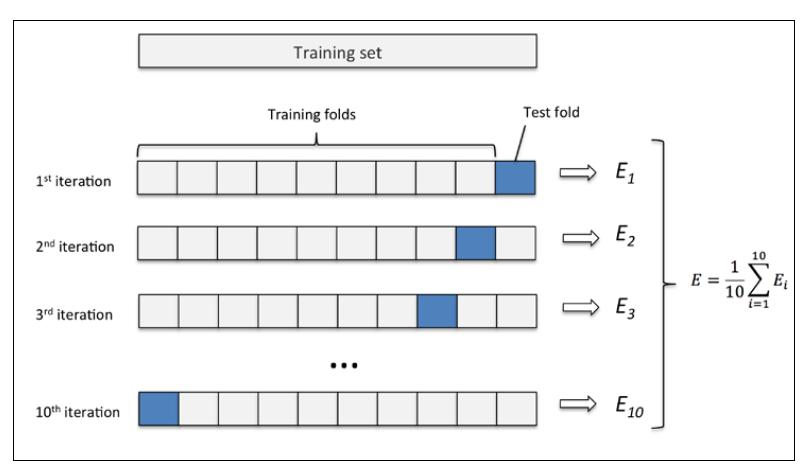

# **Пример**

Создание новых дамми-переменных на основе категориальных

In [45]:
# Создадим бинарные переменные из колонок с категориями
dummies_objects = pd.get_dummies(dataframe[objects_names], prefix=objects_names, )
# Присоединим к фрейму столбцы с дамми-переменными
dataframe_with_dummies = dataframe.join(dummies_objects)

dataframe_with_dummies.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave   NaN      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave   NaN      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave   NaN      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave   NaN      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave   NaN      IR1   

  LandContour Utilities  ... SaleType_ConLw SaleType_New SaleType_Oth  \
0         Lvl    AllPub  ...              0            0            0   
1         Lvl    AllPub  ...              0            0            0   
2         Lvl    AllPub  ...              0            0            0   
3         Lvl    AllPub  ...              0            0            0   
4         Lvl    AllPub  ...              0            0            0   

  SaleType_WD SaleCondition_Abnorml SaleCondition_AdjLand  \
0           1                     0                     0   
1           1                     0                     0   
2           1                     0                     0   
3           1                     1                     0   
4           1                     0                     0   

  SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                    0                     0                     1   
1                    0                     0                     1   
2                    0                     0                     1   
3                    0                     0                     0   
4                    0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 333 columns]

Выделим все названия числовых колонок в отдельный вектор для индексации в новом датафрейме признаков

In [46]:
predictor_lasso_colnames = dataframe_with_dummies.describe().axes[1]
# Хотелось бы без переприсваивания, но без него не работает
predictor_lasso_colnames = predictor_lasso_colnames.drop(['Id', 'SalePrice'])
predictor_lasso_colnames

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

In [47]:
# Выделение предикторов в отдельную таблицу
X = dataframe_with_dummies[predictor_lasso_colnames]
X = X.interpolate(Axis=1)
print(X.shape)

# Выделение откликов в отдельную таблицу
Y = dataframe_with_dummies['SalePrice']
print(Y.shape)

(1460, 288)
(1460,)


In [48]:
seed=123
test_ratio = 0.2
cv_parts = 4

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (1168, 288)
Размер откликов для тренировки и кросс-валидации (1168,)


## **Модель Lasso**

В библиотеке **sklearn** Lasso-регрессия со встроенным механизмом минимизации гиперпараметра $\lambda$ (в аргументах $\alpha$) на основе кросс-валидации реализована в классе **LassoCV** с основными аргументами при инициализации:

- **eps** (i.e. $\varepsilon$): float, значение по умолчанию равно 1e-3 (i.e. $10^{-4}$).
Длина пути. Значение $ɛ=10^{-4}$ означает, что $\alpha_{min} / \alpha_{max} = 10^{-4}$.
    
- **n_alphas**: int, по умолчанию равен 100.
Количество альф на пути регуляризации.

- **alphas**: numpy.ndarray, по умолчанию равен **None**
Список альф, где вычислять модели. Если нет, набор альф устанавливается автоматически.
    
- **max_iter**: int, по умолчанию равен 1000
Максимальное количество итераций
    
- **tol**: float, по умолчанию равен $10^{-5}$
Допуск для оптимизации: если обновления меньше, чем tol, код оптимизации проверяет квадрат ошибки на оптимальность и продолжает, пока он не станет меньше, чем tol.
    
- **cv**: int, cross-validation generator or iterable, по умолчанию равен **None**
Определяет стратегию разделения перекрестной проверки. Возможные входные данные для cv:
1. None, чтобы использовать 5-кратную перекрестную проверку по умолчанию,
2. int, чтобы указать количество перекрестных проверок.
3. Объект класса перекресной проверки **Sklearn**.

- **n_jobs**: int, по умолчанию равен **None**
Количество ЦП для использования во время перекрестной проверки. None означает 1. -1 означает использование всех процессоров.

- **random_state**: int, начало датчика случайных чисел, по умолчанию равен **None**
Начальное значение генератора псевдослучайных чисел, который выбирает случайный объект для обновления. 


In [49]:
# Построение модели Lasso регрессии с 4 проходами по валидационным выборкам
# Чем меньше длина пути регуляризационного lambda, тем меньше коэффициентов модели обнулится 
# Аргументы для настройки пути гиперпараметра приходится подбирать
model_LASSO_cv = LassoCV(eps = 0.0000005, 
                         n_alphas = 2000, 
                         cv = 5, 
                         random_state = seed,
                         n_jobs = -1)

# Активация обучения по тренировочному датасету
model_LASSO_cv.fit(X_train, Y_train)

LassoCV(cv=5, eps=5e-07, n_alphas=2000, n_jobs=-1, random_state=123)

In [50]:
# Оценка R^2 на тренировочной выборке
model_LASSO_cv.score(X_train, Y_train)

0.9154846819068801

In [51]:
# Оценка R^2 на отложенной выборке (модель не видела этих данных)
model_LASSO_cv.score(X_test, Y_test)

0.9006536408029635

In [52]:
# Оценка средней ошибки прогноза
lasso_preds = model_LASSO_cv.predict(X_test)
MAE_lasso_dummies = mean_absolute_error(Y_test, lasso_preds)
MAE_lasso_dummies

14944.972041652325

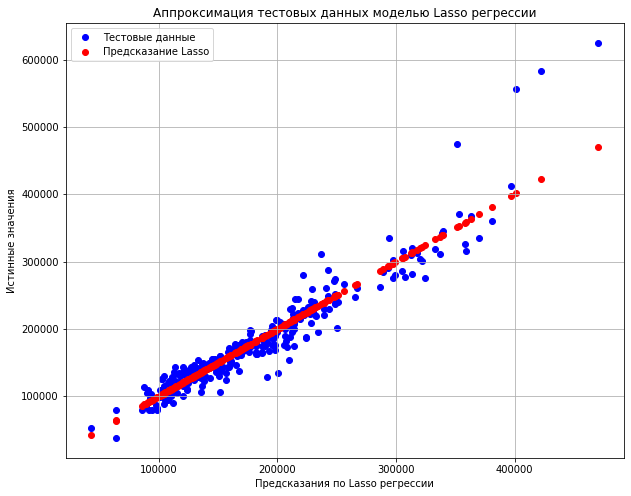

In [53]:
# Построение графика регрессии
plt.scatter(lasso_preds, Y_test, c = 'b', label = 'Тестовые данные')
plt.scatter(lasso_preds, lasso_preds, c = 'r', label = 'Предсказание Lasso')
plt.xlabel("Предсказания по Lasso регрессии")
plt.ylabel("Истинные значения")
plt.title("Аппроксимация тестовых данных моделью Lasso регрессии")
plt.legend()
plt.show()

C:\Users\vasil\AppData\Local\Temp\ipykernel_8276\3557122201.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_groups = 1 + np.int(np.log2(len(errors_norm)))


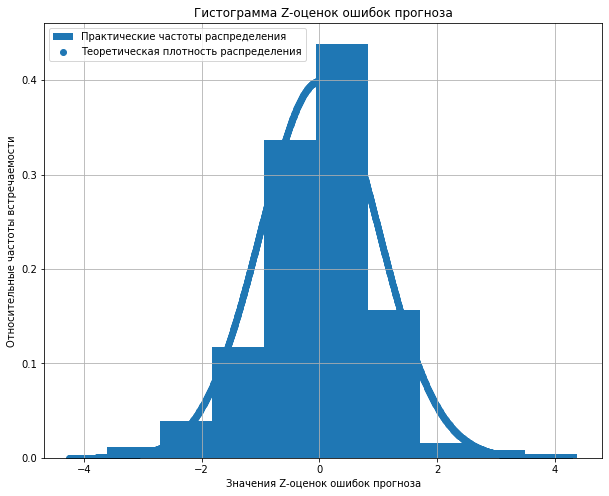

In [54]:
# Посмотрим на распределение остатков
errors = Y_test - lasso_preds
# Отбросим выбросы за 4 стандартных отклонения
errors_norm = errors[np.abs(errors) < 4 * np.std(errors)]
# Количество групп по Стёрджесу
n_groups = 1 + np.int(np.log2(len(errors_norm)))
# Вычисление Z-оценок для ошибок
z_errors = (errors_norm - np.mean(errors_norm)) / np.std(errors_norm)

# Предположим нормальность остатков и найдем параметры
normal = lambda x: 1/np.sqrt(2.0 * np.pi) * np.exp( - (x) ** 2/(2.0))
grid = np.linspace(-4.25, 4.25, 1000)

# График Z-оценок ошибок модели
plt.hist(z_errors, 
         bins = n_groups,
         density = True,
         label = "Практические частоты распределения")
plt.scatter(grid, 
         normal(grid), 
         label = "Теоретическая плотность распределения")
plt.xlabel("Значения Z-оценок ошибок прогноза")
plt.ylabel("Относительные частоты встречаемости")
plt.title("Гистограмма Z-оценок ошибок прогноза")
plt.legend()
plt.show()

## **Модель Ridge**

В **sklearn** реализацией Ridge-регрессии с отбором гиперпараметра по кросс-валидации занимается класс **RidgeCV**. Основные аргументы:



In [55]:
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 1000), cv = 5)
model_RIDGE_cv.fit(X_train, Y_train)
model_RIDGE_cv.best_score_

0.7936570964895381

In [56]:
model_RIDGE_cv.alpha_

10.543543543543544

In [57]:
model_RIDGE_cv.score(X_train, Y_train)

0.8988358012316204

In [58]:
model_RIDGE_cv.score(X_test, Y_test)

0.8910779776908058

In [59]:
ridge_preds = model_RIDGE_cv.predict(X_test)
MAE_ridge_dummies = mean_absolute_error(Y_test, ridge_preds)
MAE_ridge_dummies

16262.235137285166

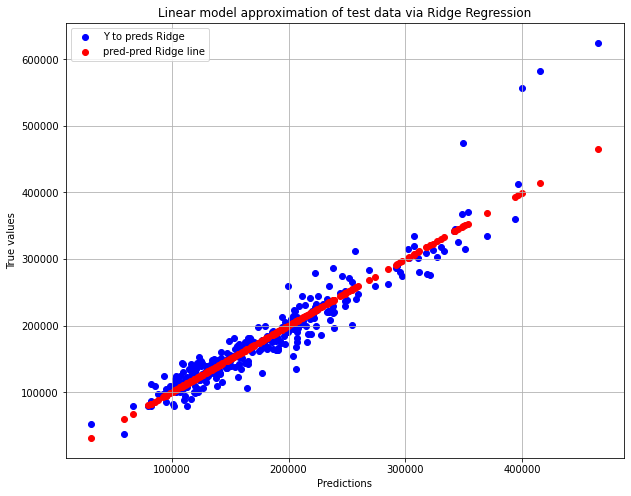

In [60]:
plt.scatter(ridge_preds, Y_test, c = 'b', label = 'Y to preds Ridge')
plt.scatter(ridge_preds, ridge_preds, c = 'r', label = 'pred-pred Ridge line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Ridge Regression")
plt.legend()
plt.show()

In [61]:
# Коэффициенты модели
# model_RIDGE_cv.coef_

In [62]:
# Стартовая цена дома, при всех предикторах == 0
model_RIDGE_cv.intercept_

468775.73316141637

## **Итог**

In [63]:
print("Средняя абсолютная ошибка по линейной модели с числовыми предикторами", MAE_real)
print("Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами", MAE_lasso_dummies)
print("Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами", MAE_ridge_dummies)

Средняя абсолютная ошибка по линейной модели с числовыми предикторами 19168.626046679863
Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами 14944.972041652325
Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами 16262.235137285166


# **Задачи для самостоятельного выполнения**

## **Задача №1. Реализация линейной регрессии**

1. Реализовать функцию для нахождения параметров линейной модели регрессии на одну переменную любым удобным методом (*аналитическое решение*,*градиентный спуск*, *нормальное уравнение*). 

$$
\hat{y}(x) = a\cdot x + b
$$

Сигнатура функции:


In [64]:
def single_LM(X, y):
  X =  np.reshape(X, ((len(X),1)))
  m = X.shape[0] 
  k = np.append(X, np.ones((m,1)), axis = 1)    
  y = y.reshape(m,1)
  prm = np.dot(np.linalg.inv(np.dot(k.T, k)), np.dot(k.T, y))
  
  return np.reshape(prm, (len(prm),))


2. Реализовать функцию решения задачи многопараметрической линейной регрессии на основе матрицы входных данных также любым удобным для вас способом.

$$
\hat{y}(x) = p_0 + p_1 \cdot x_1 + p_2 \cdot x_2 + \dots + p_n \cdot x_n,
$$

где $x_i, i = 1, 2 \dots, n\ -$ параметры-столбцы матрицы данных $X$, а $p_i\ -$ параметры модели.

In [65]:
# На месте  *args и **kwargs расположите необходимое количество аргументов 
def multiple_LM(X_matrix, y_vec):
  params = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_vec.reshape(-1, 1)
  return params

3. На базе метода многопараметрической регерссии реализовать функцию нахождения коэффициентов полиномиальной регресии на одну переменную по принципу формирования 
[матрицы Вандермонда](https://dic.academic.ru/dic.nsf/ruwiki/425350):

$$
\hat{y}(x) = p_0 + p_1 \cdot x + p_2 \cdot x^2 + \dots + p_n \cdot x^n
$$

In [66]:
# На месте  *args и **kwargs расположите необходимое количество аргументов 
def poly_regression(x_vec, y_vec, degree):
  vander_matrix = np.vander(x = x_vec, N = degree + 1, increasing=True)
  coeffs = np.linalg.inv(vander_matrix.T @ vander_matrix) @ vander_matrix.T @ y_vec.reshape(-1, 1)
  return np.round(np.reshape(coeffs, (len(coeffs),)), 2)

4. Проверить на исходных данных отклика $y$ с одной переменной $x$ несколько моделей регрессии. 

- Построить линейную модель регрессии, оценить её коэффициенты.
- Построить для $m = 2, 3, 4, 5, 6, 7, 8$ степеней модели полиномиальной регрессии

In [67]:
# Загрузка тренировочных данных
train_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/data_regr_train.csv")
x_vec = np.array(train_data["x"])
y_vec = np.array(train_data["y"])

# Найдем параметры линейной модели
params = single_LM(x_vec, y_vec)

# Вычисления коэффициентов нелинейной модели
params_2 = poly_regression(x_vec, y_vec, 2)
params_3 = poly_regression(x_vec, y_vec, 3)
params_4 = poly_regression(x_vec, y_vec, 4)
params_5 = poly_regression(x_vec, y_vec, 5)
params_6 = poly_regression(x_vec, y_vec, 6)
params_7 = poly_regression(x_vec, y_vec, 7)
params_8 = poly_regression(x_vec, y_vec, 8)

5. Для каждой из оцененных моделей линейной и полиномиальной регрессии провести вычисление метрики $R^2$ на тестовых данных. Объясните поведение метрики при повышении степени модели регрессии

In [68]:
# Реализовать вычисления коэффициента детерминации

def det_coeff(x, y, degree):
 results = 0
 coeffs = np.polyfit(x, y, degree)
 p = np.poly1d(coeffs)
 yhat = p(x)
 ybar = np.sum(y)/len(y)
 ssreg = np.sum((yhat - ybar)**2)
 sstot = np.sum((y - ybar)**2)
 results = ssreg / sstot

 return results

# Тестовые данные
test_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/data_regr_test.csv")
x_test = np.array(test_data["x"])
y_test = np.array(test_data["y"])

# Оценка зависимости на неизвестных значениях при обучении

pred_linear = params[0] + params[1] * x_test
pred_poly2 = ((np.vander(x = x_test, N = 3, increasing=True)) @ params_2).reshape(-1)
pred_poly3 = ((np.vander(x = x_test, N = 4, increasing=True)) @ params_3).reshape(-1)
pred_poly4 = ((np.vander(x = x_test, N = 5, increasing=True)) @ params_4).reshape(-1)
pred_poly5 = ((np.vander(x = x_test, N = 6, increasing=True)) @ params_5).reshape(-1)
pred_poly6 = ((np.vander(x = x_test, N = 7, increasing=True)) @ params_6).reshape(-1)
pred_poly7 = ((np.vander(x = x_test, N = 8, increasing=True)) @ params_7).reshape(-1)
pred_poly8 = ((np.vander(x = x_test, N = 9, increasing=True)) @ params_8).reshape(-1)


# Коэффициенты R^2
print(f"Коэффициент детерминации для линейной модели R^2 = {det_coeff(x_test, y_test, 1)}")
print(f"Коэффициент детерминации для m = 2 R^2 = {det_coeff(x_test, y_test, 2)}")
print(f"Коэффициент детерминации для m = 3 модели R^2 = {det_coeff(x_test, y_test, 3)}")
print(f"Коэффициент детерминации для m = 4 модели R^2 = {det_coeff(x_test, y_test, 4)}")
print(f"Коэффициент детерминации для m = 5 модели R^2 = {det_coeff(x_test, y_test, 5)}")
print(f"Коэффициент детерминации для m = 6 модели R^2 = {det_coeff(x_test, y_test, 6)}")
print(f"Коэффициент детерминации для m = 7 модели R^2 = {det_coeff(x_test, y_test, 7)}")
print(f"Коэффициент детерминации для m = 8 модели R^2 = {det_coeff(x_test, y_test, 8)}")

Коэффициент детерминации для линейной модели R^2 = 0.18857415677788328
Коэффициент детерминации для m = 2 R^2 = 0.27780923458000917
Коэффициент детерминации для m = 3 модели R^2 = 0.9358288128849485
Коэффициент детерминации для m = 4 модели R^2 = 0.9368691743463182
Коэффициент детерминации для m = 5 модели R^2 = 0.9387589918491038
Коэффициент детерминации для m = 6 модели R^2 = 0.9389876667404485
Коэффициент детерминации для m = 7 модели R^2 = 0.9390875194659463
Коэффициент детерминации для m = 8 модели R^2 = 0.9392013731013685


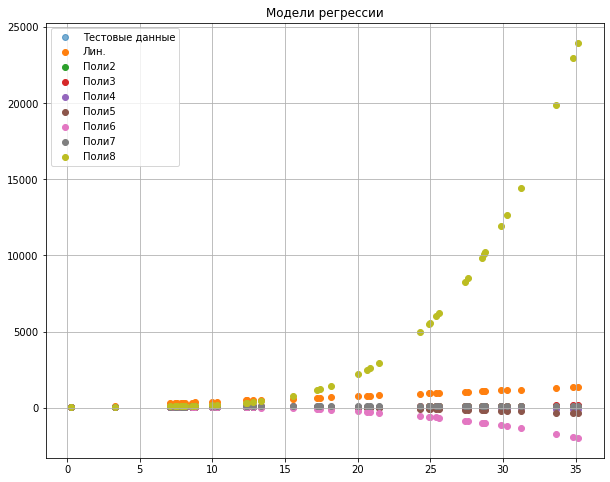

In [69]:
plt.figure(figsize = (10, 8))
plt.title("Модели регрессии")
plt.scatter(x = x_test, y = y_test, label = "Тестовые данные", alpha = 0.6)
plt.scatter(x_test, pred_linear, label = "Лин.")
plt.scatter(x_test, pred_poly2, label = "Поли2")
plt.scatter(x_test, pred_poly3, label = "Поли3")
plt.scatter(x_test, pred_poly4, label = "Поли4")
plt.scatter(x_test, pred_poly5, label = "Поли5")
plt.scatter(x_test, pred_poly6, label = "Поли6")
plt.scatter(x_test, pred_poly7, label = "Поли7")
plt.scatter(x_test, pred_poly8, label = "Поли8")
plt.legend()
plt.show()

6. Для лучшей модели реализуйте простую проверку остатков на одно из известных распределений.

In [70]:
# Ваш код здесь

## ***Задача №3. Восстановление зависимости**

Данные в таблице:

1. Дата замера
2. Ртр МПа 	- давление в трубе в МегаПаскалях
3. Туст °С - температура установки в градусах цельсия
4. газ м3/сут	- скорость добычи газа в сутки в кубических метрах
5. конд-т м3/сут - скорость побочной добычи конденсата в сутки в кубических метрах
6. вода м3/сут - скорость добычи воды в сутки в кубических метрах
7. ID - номер скважины
8. Куст - наименование группы скважин
9. Группа - географическое место расположения кустов и скважин

Задача состоит в том, чтобы восстановить пропущенные значения исходного ряда данных на основе линейной регрессии.

1. Импортировать данные в Python из внешнего источника данных

In [71]:
GAZ_data = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/RpracticeBook/master/2Data/01FlatTables/GAZ.csv",
                       sep = "\t", decimal = ',')
GAZ_data.head()

дата замера  Ртр МПа  Туст °С  газ м3/сут  конд-т м3/сут  вода м3/сут   ID  \
0   12/5/2015     15.5      NaN    771912.0            NaN          NaN  110   
1  13/05/2015    150.0     73.4    827421.0            NaN          NaN  110   
2  16/05/2015     16.7     71.0    443574.0            NaN          NaN  110   
3  20/05/2015     17.9     66.0    304479.0            NaN          NaN  110   
4  26/05/2015     17.5     70.0    361939.0           2.72         2.44  110   

  Куст       Группа  
0  К-А  Кувачи-Алат  
1  К-А  Кувачи-Алат  
2  К-А  Кувачи-Алат  
3  К-А  Кувачи-Алат  
4  К-А  Кувачи-Алат

2. Перевести колонку данных "дата замера" в формат дата и время

In [72]:
GAZ_data['дата замера'] = pd.to_datetime(GAZ_data['дата замера'], format='%d/%m/%Y')
GAZ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28162 entries, 0 to 28161
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   дата замера    28162 non-null  datetime64[ns]
 1   Ртр МПа        28104 non-null  float64       
 2   Туст °С        28037 non-null  float64       
 3   газ м3/сут     28159 non-null  float64       
 4   конд-т м3/сут  28138 non-null  float64       
 5   вода м3/сут    28138 non-null  float64       
 6   ID             28162 non-null  object        
 7   Куст           28162 non-null  object        
 8   Группа         28162 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.9+ MB


3. Заполнить пропущенные данные в столбцах

In [73]:
GAZ_data['Ртр МПа'].fillna(float(GAZ_data['Ртр МПа'].mean()), inplace=True) 
GAZ_data['Туст °С'].fillna(float(GAZ_data['Туст °С'].mean()), inplace=True) 
GAZ_data['газ м3/сут'].fillna(float(GAZ_data['газ м3/сут'].mean()), inplace=True) 
GAZ_data['конд-т м3/сут'].fillna(float(GAZ_data['конд-т м3/сут'].mean()), inplace=True) 
GAZ_data['вода м3/сут'].fillna(float(GAZ_data['вода м3/сут'].mean()), inplace=True) 
GAZ_data.isna().sum()

дата замера      0
Ртр МПа          0
Туст °С          0
газ м3/сут       0
конд-т м3/сут    0
вода м3/сут      0
ID               0
Куст             0
Группа           0
dtype: int64

4. Проверить значения в столбцах на выбросы с помощью графика ящик с усами. При наличии выбросов скорректировать их любым способом

<AxesSubplot:>

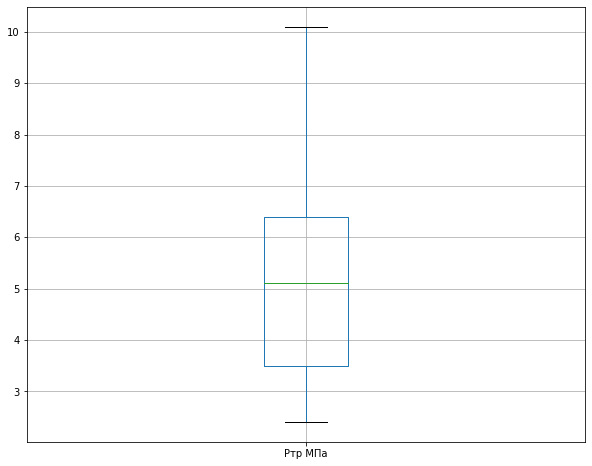

In [74]:
q_low1 = GAZ_data["Ртр МПа"].quantile(0.05)
q_hi1  = GAZ_data["Ртр МПа"].quantile(0.95)
 
GAZ_data1 = GAZ_data[(GAZ_data["Ртр МПа"] < q_hi1) & (GAZ_data["Ртр МПа"] > q_low1)]
GAZ_data1.boxplot(column=['Ртр МПа'])

<AxesSubplot:>

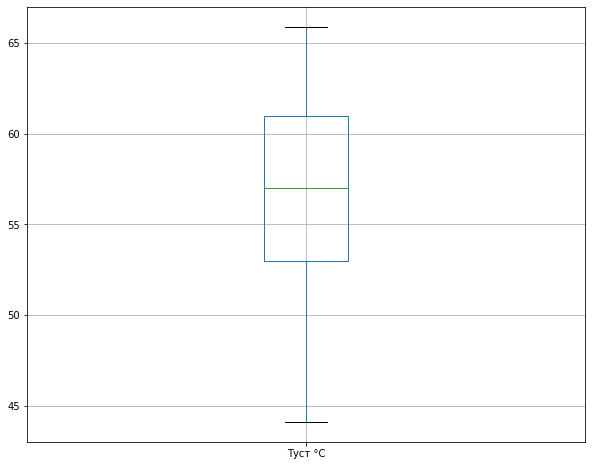

In [75]:
q_low2 = GAZ_data1["Туст °С"].quantile(0.15)
q_hi2  = GAZ_data1["Туст °С"].quantile(0.85)
 
GAZ_data2 = GAZ_data1[(GAZ_data1["Туст °С"] < q_hi2) & (GAZ_data1["Туст °С"] > q_low2)]

GAZ_data2.boxplot(column=['Туст °С'])

<AxesSubplot:>

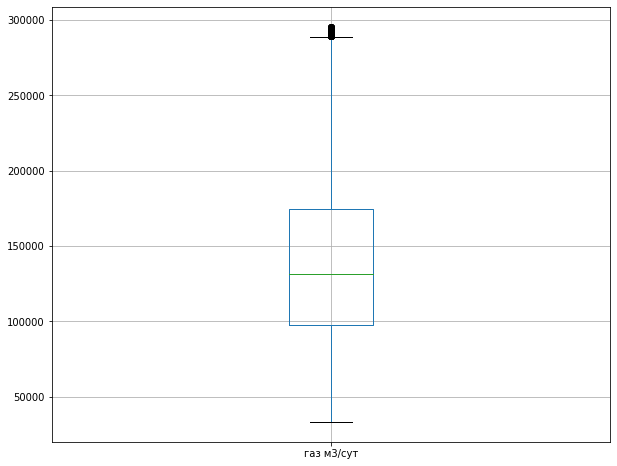

In [76]:
q_low3 = GAZ_data2["газ м3/сут"].quantile(0.01)
q_hi3  = GAZ_data2["газ м3/сут"].quantile(0.95)
 
GAZ_data3 = GAZ_data2[(GAZ_data2["газ м3/сут"] < q_hi3) & (GAZ_data2["газ м3/сут"] > q_low3)]

GAZ_data3.boxplot(column=['газ м3/сут'])


<AxesSubplot:>

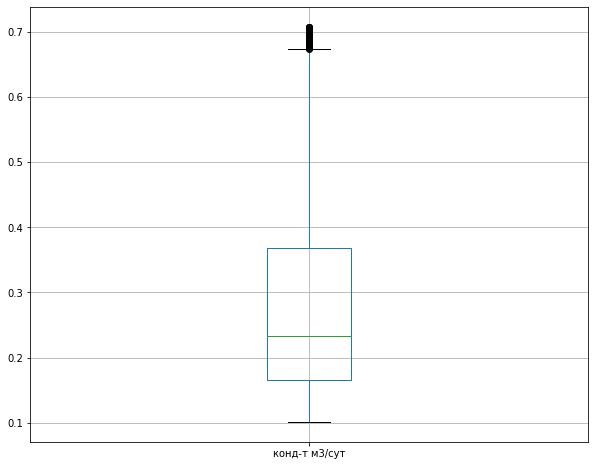

In [77]:
q_low4 = GAZ_data3["конд-т м3/сут"].quantile(0.25)
q_hi4  = GAZ_data3["конд-т м3/сут"].quantile(0.9)
 
GAZ_data4 = GAZ_data3[(GAZ_data3["конд-т м3/сут"] < q_hi4) & (GAZ_data3["конд-т м3/сут"] > q_low4)]

GAZ_data4.boxplot(column=['конд-т м3/сут'])

<AxesSubplot:>

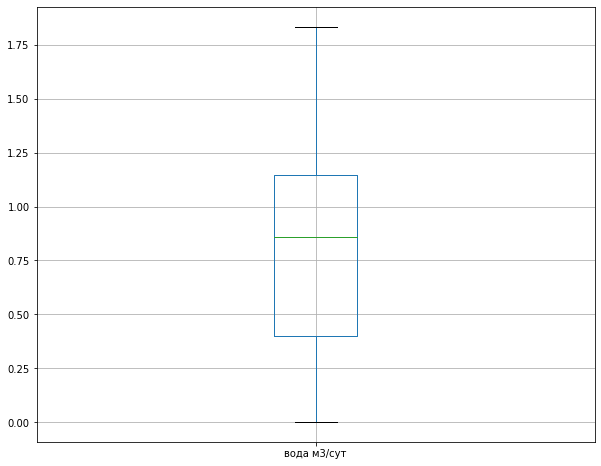

In [78]:
q_low5 = GAZ_data4["вода м3/сут"].quantile(0.01)
q_hi5  = GAZ_data4["вода м3/сут"].quantile(0.9)
 
GAZ_data5 = GAZ_data4[(GAZ_data4["вода м3/сут"] < q_hi5) & (GAZ_data4["вода м3/сут"] > q_low5)]
GAZ_data5.boxplot(column=['вода м3/сут'])

5. Выбрать любой id куста и сформировать по данному id подвыборку данных той же структуры

In [79]:
GAZ_data5['Куст'].value_counts()

КП 11     1504
КП 19     1392
КП 9      1164
КП 16     1027
КП 2       706
КП 301     655
КП 14      530
СШ         444
КП 12      443
КП 242     400
КП 1       306
К-А        153
КП 3        20
Name: Куст, dtype: int64

In [80]:
kust = GAZ_data5.loc[GAZ_data5['Куст'] == 'КП 19']
kust.head()

дата замера  Ртр МПа  Туст °С  газ м3/сут  конд-т м3/сут  вода м3/сут  \
16853  2010-12-13      6.4     48.7    247620.2          0.614        0.306   
16854  2011-01-04      6.2     48.6    239202.1          0.634        0.419   
16855  2011-01-29      6.3     49.3    233614.3          0.557        1.088   
16872  2011-09-16      6.1     47.9    221409.3          0.593        0.797   
16873  2011-09-17      6.1     49.5    218340.2          0.538        0.886   

        ID   Куст  Группа  
16853  17B  КП 19  Хаузак  
16854  17B  КП 19  Хаузак  
16855  17B  КП 19  Хаузак  
16872  17B  КП 19  Хаузак  
16873  17B  КП 19  Хаузак

In [81]:
kust.columns

Index(['дата замера', 'Ртр МПа', 'Туст °С', 'газ м3/сут', 'конд-т м3/сут',
       'вода м3/сут', 'ID', 'Куст', 'Группа'],
      dtype='object')

6. Визуализировать данные числовых переменных в столбцах для куста от времени. Сформировать предположения о нелинейной модели переменных от времени.

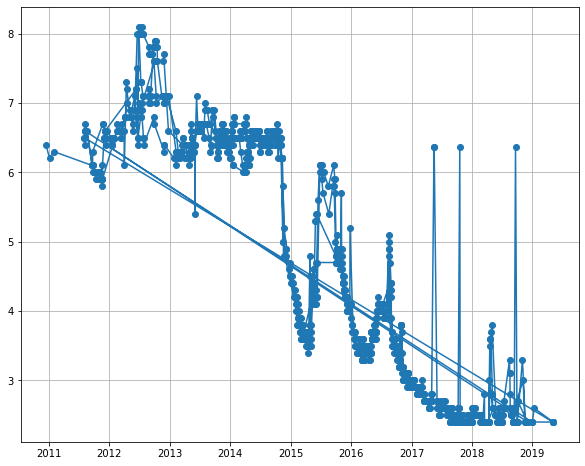

In [82]:
#kust.plot(x='дата замера', y='Туст °С',  figsize=(14, 10), grid=True, marker='o')
plt.plot(kust['дата замера'], kust['Ртр МПа'], marker='o')

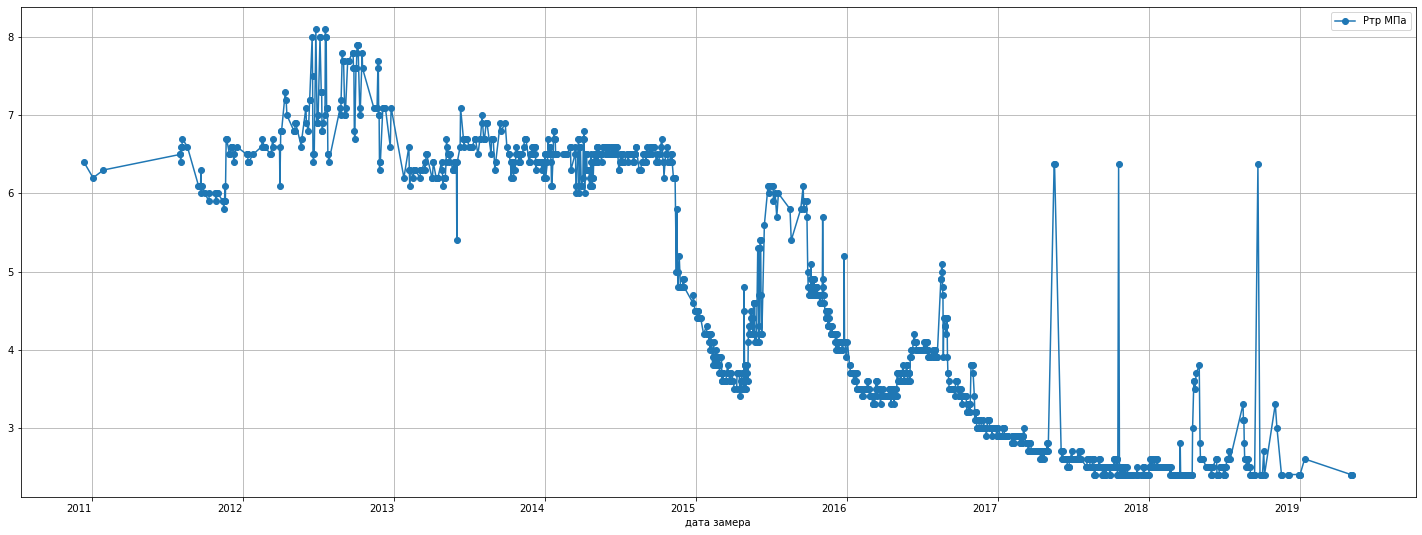

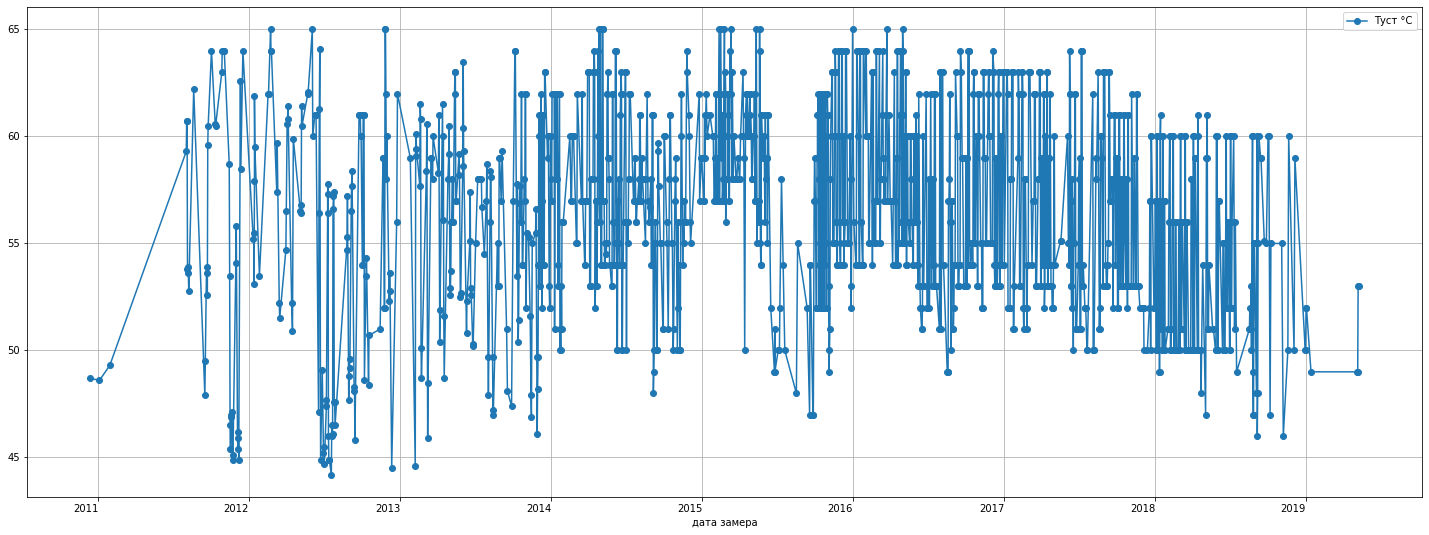

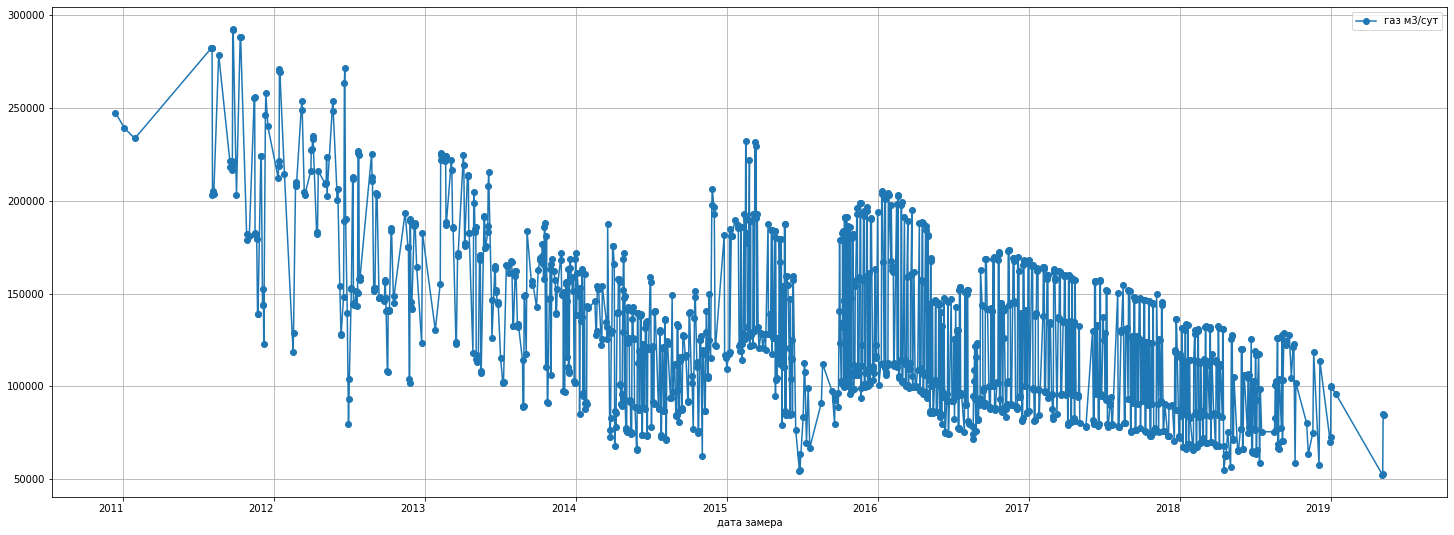

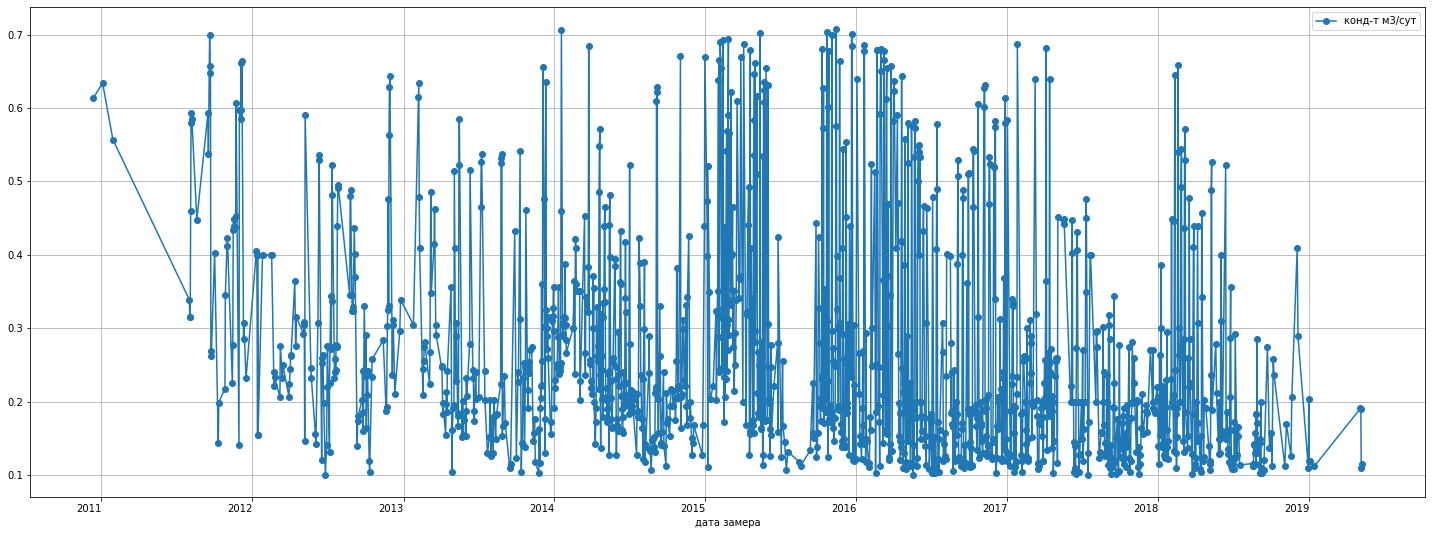

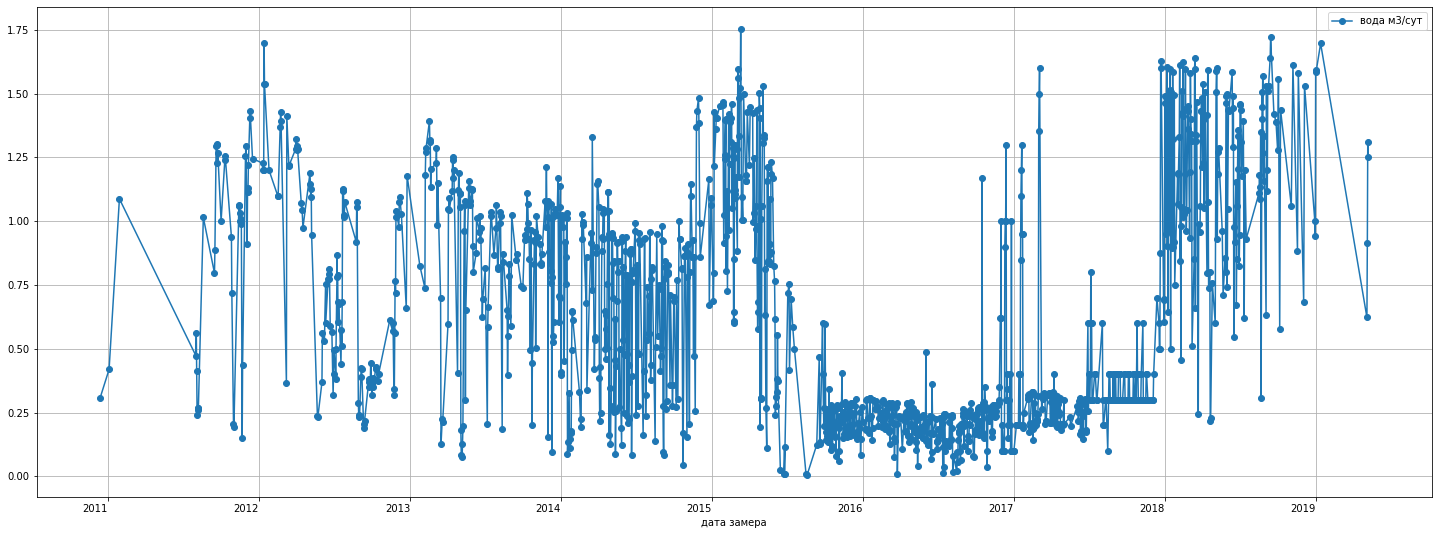

In [83]:
#df.plot(x='дата замера', y='', rot=0, figsize=(14, 10), grid=True, marker='o')
#plt.show()
##fig, axs = plt.subplots(5,  figsize=(30, 30))
#axs = axs.flatten()
#fig.subplots_adjust(wspace = 0.2, hspace = 0.2)
cols = ['Ртр МПа', 'Туст °С', 'газ м3/сут', 'конд-т м3/сут', 'вода м3/сут']
#plt.figure(figsize= (15,10))

for i, n in enumerate(cols):
   kust.plot(x = 'дата замера', y = n, rot=0, figsize=(25, 10), grid=True, marker='o')
   #kust.set_title('data = {}'.format(n))

7. Обучить модель нелинейной регрессии для каждой переменной от времени. Получить параметры регрессии каждой переменной. (Можно использовать полиномиальные модели и/или экспоненциальные модели на основе метода анаморфоз)

8. По модели регрессии восстановить данные в отсутствующие в таблице дни и получить новую таблицу данных значений переменных на каждый день наблюдения до сегодняшнего дня.

9. Получите значение переменных на сегодняшний день. Оцените их физическую адекватность. В случае отсутствия таковой, изменить модель регрессии.

## **Задача №2. California Housing, прогнозирование цен на квартирные дома**

В задании требуется построить лучшую модель для прогнозирования средней цены дома на основе имеющихся признаков

In [84]:
train_data = pd.read_csv("./content/california_housing_train.csv")
test_data = pd.read_csv("./content/california_housing_test.csv")

print(f"Размер тренировочной выборки {train_data.shape}")
print(f"Размер тестовой выборки {test_data.shape}")

Размер тренировочной выборки (17000, 9)
Размер тестовой выборки (3000, 9)


In [85]:
# Train и Test
y_train = train_data["median_house_value"]
y_test = test_data["median_house_value"]
X_train = train_data.iloc[:,:-1]
X_test = test_data.iloc[:,:-1]

X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  
0      1015.0       472.0         1.4936  
1      1129.0       463.0         1.8200  
2       333.0       117.0         1.6509  
3       515.0       226.0         3.1917  
4       624.0       262.0         1.9250

1. Построить модель линейной регрессии на основе исходной таблицы параметров и оценить её качество на тестовой подвыборке


In [86]:
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.score(X_test,y_test)

0.6195057678312026

2. Провести генерацию новых нелинейных признаков на основе исходных переменных для улучшения качества модели линейной регрессии


In [87]:

X_train['stake_bedrooms'] = X_train['total_bedrooms']/X_train['total_rooms']
X_train['people_in_room'] = X_train['population']/X_train['total_rooms']
X_train['people_in_bedroom'] = X_train['population']/X_train['total_bedrooms']
X_train['people_in_household'] = X_train['population']/X_train['households']
X_train['rooms_in_household'] = X_train['total_rooms']/X_train['households']
X_train['medincome_of_household'] = X_train['households']*X_train['median_income']

X_test['stake_bedrooms'] = X_test['total_bedrooms']/X_test['total_rooms']
X_test['people_in_room'] = X_test['population']/X_test['total_rooms']
X_test['people_in_bedroom'] = X_test['population']/X_test['total_bedrooms']
X_test['people_in_household'] = X_test['population']/X_test['households']
X_test['rooms_in_household'] = X_test['total_rooms']/X_test['households']
X_test['medincome_of_household'] = X_test['households']*X_test['median_income']

X_test.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  stake_bedrooms  people_in_room  \
0      1537.0       606.0         6.6085        0.170142        0.395624   
1       809.0       277.0         3.5990        0.205298        0.535762   
2      1484.0       495.0         5.7934        0.141265        0.413486   
3        49.0        11.0         6.1359        0.223881        0.731343   
4       850.0       237.0         2.9375        0.196616        0.684932   

   people_in_bedroom  people_in_household  rooms_in_household  \
0           2.325265             2.536304            6.410891   
1           2.609677             2.920578            5.451264   
2           2.927022             2.997980            7.250505   
3           3.266667             4.454545            6.090909   
4           3.483607             3.586498            5.236287   

   medincome_of_household  
0               4004.7510  
1                996.9230  
2               2867.7330  
3                 67.4949  
4                696.1875

3. На онове линейной модели с перечнем сгененированных столбцов из пунтка 2 с помощью метода $Lasso$ или $Ridge$ регрессии подобрать параметр регуляризации  для получения лучшей модели на тестовых данных.


In [88]:

model_LASSO_cv = LassoCV(alphas = np.arange(1, 100, 5),
                         n_alphas = 2000, 
                         cv = 10,
                         n_jobs = -1)

model_LASSO_cv.fit(X_train, y_train)
model_LASSO_cv.score(X_test, y_test)

c:\Users\vasil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5095625858657.555, tolerance: 21274982994.64374
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vasil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24533213603.984375, tolerance: 21274982994.64374
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vasil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2031576005737.4531, tolerance: 21445235805.00144
  model = cd_fast.enet_coordinate_descent_gram(
c:\Us

0.6305899345641601

4. Привести лучшую модель, дающую лучший коэффициент детерминации на тестовой выборке

## ***Задача №4. Регрессия финансовых данных**

Для прогнозирования предоставляются биржевые данные цен акций компании **Apple**. 

**Задание**: спрогнозировать данные **$Close\ -$** цены закрытия на следующую временную отметку $t+1$, при условии что данные заканчиваются на отметке $t$.

То есть необходимо разработать метод оценки $$\hat{y}(x_{t+1}) \approx y(x_{t + 1})$$

Оценку работы модели проводить на отложенных данных в пропорции 95% в третировочной выборке и 5% в тестовой.
Выборку необходимо делить без случайного перемешивания, соблюдая временную последовательность.

In [89]:
!pip install yfinance

In [90]:
import yfinance as yf

In [91]:
tickers = "AAPL"
data = yf.download(tickers, interval="5m", period="60d")

[*********************100%***********************]  1 of 1 completed


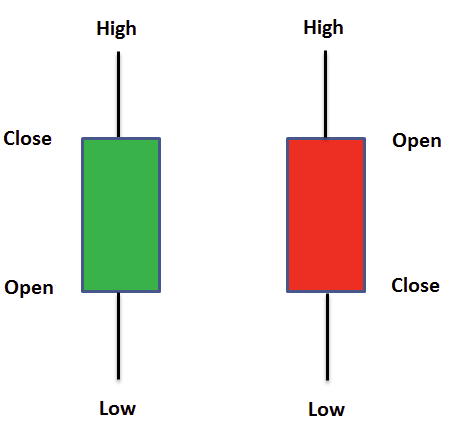

In [92]:
data = pd.DataFrame(data)
data

Open        High         Low       Close  \
Datetime                                                              
2022-09-22 09:30:00  153.000000  153.470001  152.809998  153.070007   
2022-09-22 09:35:00  153.087708  153.529999  152.529999  152.720001   
2022-09-22 09:40:00  152.710007  152.949997  152.070007  152.309906   
2022-09-22 09:45:00  152.289993  152.710007  152.164993  152.210007   
2022-09-22 09:50:00  152.220001  152.449997  151.660004  151.910004   
...                         ...         ...         ...         ...   
2022-12-15 15:40:00  136.679993  136.740005  136.210007  136.225006   
2022-12-15 15:45:00  136.229996  136.389999  136.024994  136.130005   
2022-12-15 15:50:00  136.130005  136.440002  136.089996  136.440002   
2022-12-15 15:55:00  136.440002  136.669998  136.270004  136.440002   
2022-12-15 16:00:00  136.500000  136.500000  136.500000  136.500000   

                      Adj Close   Volume  
Datetime                                  
2022-09-22 09:30:00  153.070007  4741924  
2022-09-22 09:35:00  152.720001  2078085  
2022-09-22 09:40:00  152.309906  1735290  
2022-09-22 09:45:00  152.210007  1679454  
2022-09-22 09:50:00  151.910004  2870970  
...                         ...      ...  
2022-12-15 15:40:00  136.225006  1554717  
2022-12-15 15:45:00  136.130005  1617160  
2022-12-15 15:50:00  136.440002  2419094  
2022-12-15 15:55:00  136.440002  4096803  
2022-12-15 16:00:00  136.500000        0  

[4644 rows x 6 columns]

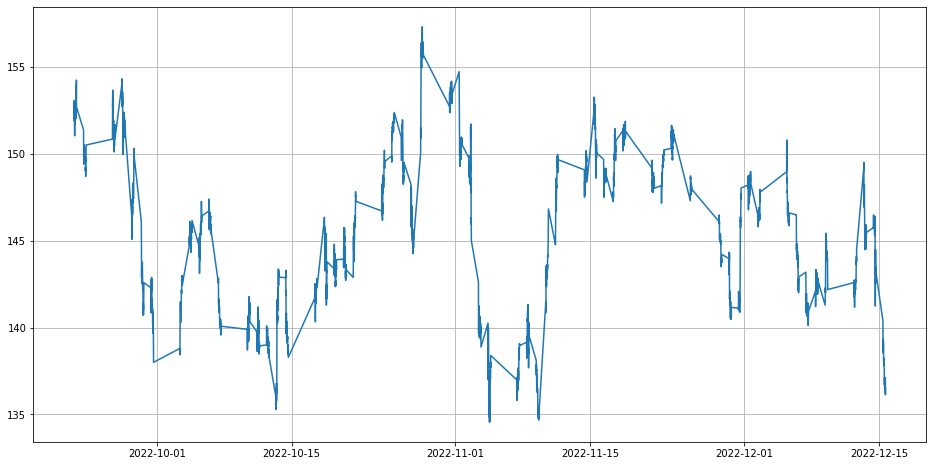

In [93]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.show()

In [94]:
train = data['2022-09-01 09:30:00' : '2022-11-23 15:55:00']
train

Open        High         Low       Close  \
Datetime                                                              
2022-09-22 09:30:00  153.000000  153.470001  152.809998  153.070007   
2022-09-22 09:35:00  153.087708  153.529999  152.529999  152.720001   
2022-09-22 09:40:00  152.710007  152.949997  152.070007  152.309906   
2022-09-22 09:45:00  152.289993  152.710007  152.164993  152.210007   
2022-09-22 09:50:00  152.220001  152.449997  151.660004  151.910004   
...                         ...         ...         ...         ...   
2022-11-23 15:35:00  150.970001  151.080002  150.839996  151.050003   
2022-11-23 15:40:00  151.050003  151.070007  150.910004  150.960007   
2022-11-23 15:45:00  150.960007  150.960007  150.630005  150.708694   
2022-11-23 15:50:00  150.710007  151.070007  150.699997  150.880005   
2022-11-23 15:55:00  150.869995  151.139999  150.750000  151.139999   

                      Adj Close   Volume  
Datetime                                  
2022-09-22 09:30:00  153.070007  4741924  
2022-09-22 09:35:00  152.720001  2078085  
2022-09-22 09:40:00  152.309906  1735290  
2022-09-22 09:45:00  152.210007  1679454  
2022-09-22 09:50:00  151.910004  2870970  
...                         ...      ...  
2022-11-23 15:35:00  151.050003   808089  
2022-11-23 15:40:00  150.960007   527509  
2022-11-23 15:45:00  150.708694   652260  
2022-11-23 15:50:00  150.880005  1102487  
2022-11-23 15:55:00  151.139999  1927843  

[3510 rows x 6 columns]

In [95]:
my_predict = data.loc['2022-11-25']
y_test = my_predict['Close'] 
x_test = my_predict.drop('Close', axis = 1)
my_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2022-11-25 09:30:00 to 2022-11-25 13:00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       41 non-null     float64
 1   High       41 non-null     float64
 2   Low        41 non-null     float64
 3   Close      41 non-null     float64
 4   Adj Close  41 non-null     float64
 5   Volume     41 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.2 KB


In [96]:
x_train = train.drop(['Close'], axis = 1)
y_train = train['Close']

In [97]:
import sklearn.tree as tree
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split

import catboost as cb

In [98]:
y_train

Datetime
2022-09-22 09:30:00    153.070007
2022-09-22 09:35:00    152.720001
2022-09-22 09:40:00    152.309906
2022-09-22 09:45:00    152.210007
2022-09-22 09:50:00    151.910004
                          ...    
2022-11-23 15:35:00    151.050003
2022-11-23 15:40:00    150.960007
2022-11-23 15:45:00    150.708694
2022-11-23 15:50:00    150.880005
2022-11-23 15:55:00    151.139999
Name: Close, Length: 3510, dtype: float64

In [99]:
model_DT_regr = tree.DecisionTreeRegressor()
model_DT_regr.fit(x_train, y_train)
preds_DT_regr = model_DT_regr.predict(x_test)
print(r2_score(y_test, preds_DT_regr)) 
preds_DT_regr

0.9993573487439245


array([147.28500366, 147.94999695, 147.98339844, 147.99510193,
       148.32499695, 148.6499939 , 148.71499634, 148.6000061 ,
       148.55999756, 148.63000488, 148.63079834, 148.3999939 ,
       148.292099  , 148.22090149, 148.22009277, 148.16999817,
       148.21000671, 148.15499878, 148.27990723, 148.15499878,
       148.11999512, 148.11999512, 147.95500183, 147.82000732,
       147.73930359, 147.63999939, 147.82000732, 147.88000488,
       148.11500549, 148.292099  , 148.22999573, 148.06010437,
       148.13000488, 147.95500183, 147.97000122, 148.16999817,
       147.95500183, 147.82000732, 147.92999268, 147.99000549,
       147.95500183])

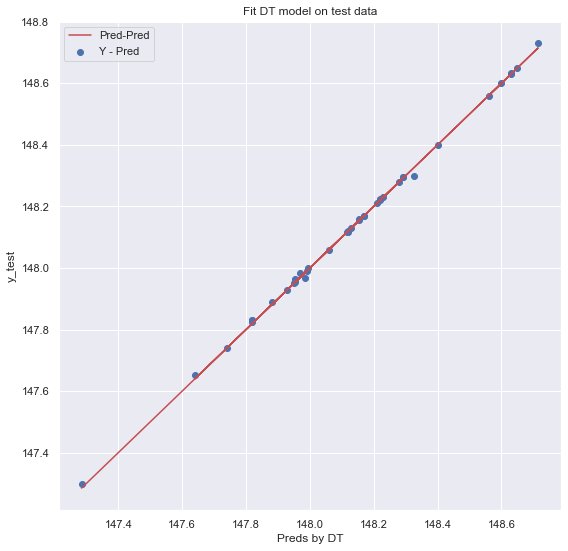

In [100]:
plt.figure(figsize = (9, 9))
plt.plot(preds_DT_regr, preds_DT_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_DT_regr, y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit DT model on test data")
plt.xlabel("Preds by DT")
plt.ylabel("y_test")
plt.show()